#The Business Problem
Amdari has recently been contacted by a local video-game resale company. Many businesses have to be on point when it comes to ordering supplies to meet the demand of its customers. An overestimation of demand leads to bloated inventory and high costs. Underestimating demand means many valued customers won't get the products they want.

In order to help plan out the supply with demand for the company's video games, the Data Science Team has been tasked with forecasting monthly sales data in order to synchronize supply with demand, and aid in decision making that will help build a competitive infrastructure and measure the growing company’s performance. My team is being asked to provide a forecast for the next 4 months of sales.

In [ ]:
!git clone https://github.com/sundaepromix/Forecasting-Video-Games-Inventory-Sales-.git


Cloning into 'Forecasting-Video-Games-Inventory-Sales-'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 19), reused 31 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 3.71 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
%cd Forecasting-Video-Games-Inventory-Sales-

/content/Forecasting-Video-Games-Inventory-Sales-


In [ ]:
!git config --global user.email "lucylight80@gmail.com"
!git config --global user.name "LucyLightCode"

In [ ]:
!git checkout -b "lucy_main"

Switched to a new branch 'lucy_main'


In [ ]:
# Import labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import skew, kurtosis
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/Forecasting-Video-Games-Inventory-Sales-/monthly_sales_data.csv')

In [ ]:
# Rename the Monthly Sales column to Sales
data.rename(columns={'Monthly Sales': 'Sales'}, inplace=True)

In [ ]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Convert date to datetime and sort chronologically
data['Date'] = pd.to_datetime(data['Month'])
data.sort_values(by='Date', inplace=True)

In [ ]:
# Create time - based feasture eng
data = data.set_index('Date')  # Set 'Date' as the index first
data['Month'] = data.index.month
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter


In [ ]:
data

,Category,Month,Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
Date,,,,,,,,,
2002-01-01,Sports,1,108592,2002,1,Xbox,1,0,1
2002-02-01,RPG,2,129387,2002,4,Nintendo,0,0,1
2002-03-01,Sports,3,114777,2002,4,PC,0,0,1
2002-04-01,Sports,4,71738,2002,0,Nintendo,0,0,2
2002-05-01,Simulation,5,142512,2002,2,PlayStation,0,0,2
...,...,...,...,...,...,...,...,...,...
2023-08-01,RPG,8,132693,2023,1,PC,0,0,3
2023-09-01,Simulation,9,143373,2023,4,Nintendo,0,0,3
2023-10-01,Simulation,10,126410,2023,6,Nintendo,0,1,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2002-01-01 to 2023-12-01
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   264 non-null    object
 1   Month      264 non-null    int32 
 2   Sales      264 non-null    int64 
 3   Year       264 non-null    int32 
 4   DayOfWeek  264 non-null    int64 
 5   Platform   264 non-null    object
 6   Holiday    264 non-null    int64 
 7   Promotion  264 non-null    int64 
 8   Quarter    264 non-null    int32 
dtypes: int32(3), int64(4), object(2)
memory usage: 17.5+ KB


In [ ]:
# Feature cardinality
data.nunique()

,0
Category,5
Month,12
Sales,264
Year,22
DayOfWeek,7
Platform,4
Holiday,2
Promotion,2
Quarter,4


#Univariate Analysis
We will analyse the distribution of variable individually, for;

* Numerical variables,

* Categorical variables.

In [ ]:
data.describe()


,Month,Sales,Year,DayOfWeek,Holiday,Promotion,Quarter
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,6.500000,112349.003788,2012.500000,3.011364,0.166667,0.204545,2.500000
std,3.458609,34144.606185,6.356339,1.995209,0.373386,0.404135,1.120158
min,1.000000,10469.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
25%,3.750000,88873.750000,2007.000000,1.000000,0.000000,0.000000,1.750000
50%,6.500000,112947.500000,2012.500000,3.000000,0.000000,0.000000,2.500000
75%,9.250000,135193.500000,2018.000000,5.000000,0.000000,0.000000,3.250000
max,12.000000,206596.000000,2023.000000,6.000000,1.000000,1.000000,4.000000


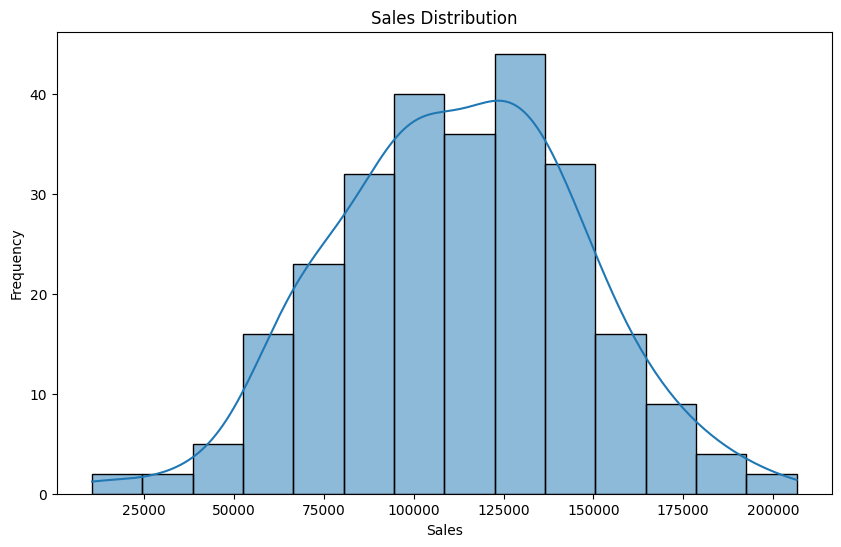

Skewness of Sales: -0.06
Kurtosis of Sales: -0.05


In [ ]:
# Create the distribution plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

sales_skewness = skew(data['Sales'])
print(f"Skewness of Sales: {sales_skewness:.2f}")

sales_kurtosis = kurtosis(data['Sales'])
print(f"Kurtosis of Sales: {sales_kurtosis:.2f}")

The sales distribution exhibits a right skew, indicating that most sales fall within a lower range with occasional high-value sales."

"The peak of the distribution represents the typical sales volume, while the spread indicates variability in sales performance."

"Understanding the sales distribution is crucial for demand planning, inventory management, and targeted marketing strategies.

"The skewness value of -0.06 is very close to 0. This indicates that the distribution of your Sales data is approximately symmetrical. It's slightly skewed to the left (negative skew), but the effect is very minor.

The kurtosis value of -0.05 indicates that the distribution of your Sales data is platykurtic. This means it has slightly thinner tails and a flatter peak compared to a normal distribution (which has a kurtosis of 0). This suggests fewer extreme values (outliers) than a normal distribution.

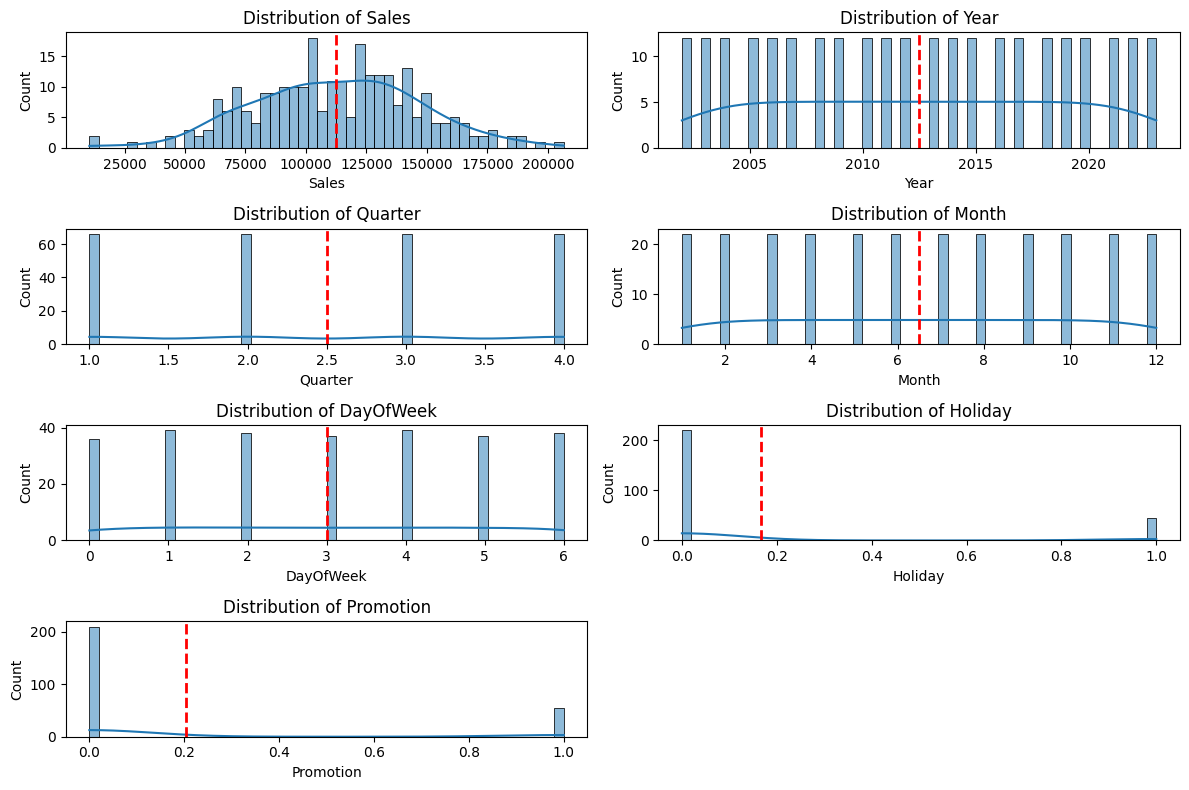

In [ ]:
# Analyse the numerical distribution
plt.figure(figsize=(12,8))

numeric_vars =['Sales',
               'Year',
               'Quarter',
               'Month',
               'DayOfWeek',
               'Holiday',
               'Promotion',
               ]

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[var], kde=True, bins=50)
    plt.axvline(data[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

* Distribution of Sales: Sales data appears to be right-skewed, with most values concentrated around a lower range and a tail extending towards higher values. This may suggest a potential for outliers.
* Distribution of Year: Sales data is collected for 6 distinct years.
* Distribution of Quarter: Q1 recorded the highest number of sales in all the 4 quarters.
* Distribution of Month: Sales appears to be highest in Feb.
* Distribution of DayOfWeek: Sales appears to be highest on Day 4.


## Categorical variables.

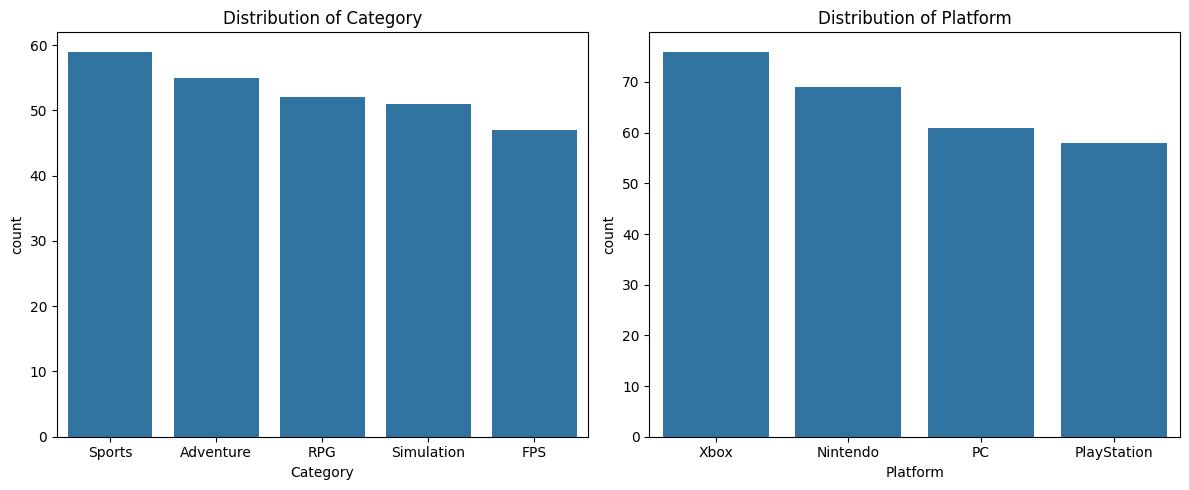

In [ ]:
# Analyse the categorical distribution
plt.figure(figsize=(12,5))

categorical_vars = ['Category','Platform']
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=data, x=var, order=data[var].value_counts().index)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


* Distribution of Category: Sports recorded the highest number/count of game  and FPS recorded the lowerest count
 .
* Distribution of Platform: There are more games available in Xbox and Playstation has the least.

#Bivariate Analysis
We look at pair of variables,by looking at:

* pairs of numerical variables,

* numerical and categorical variables,

* pairs of categorical variables.




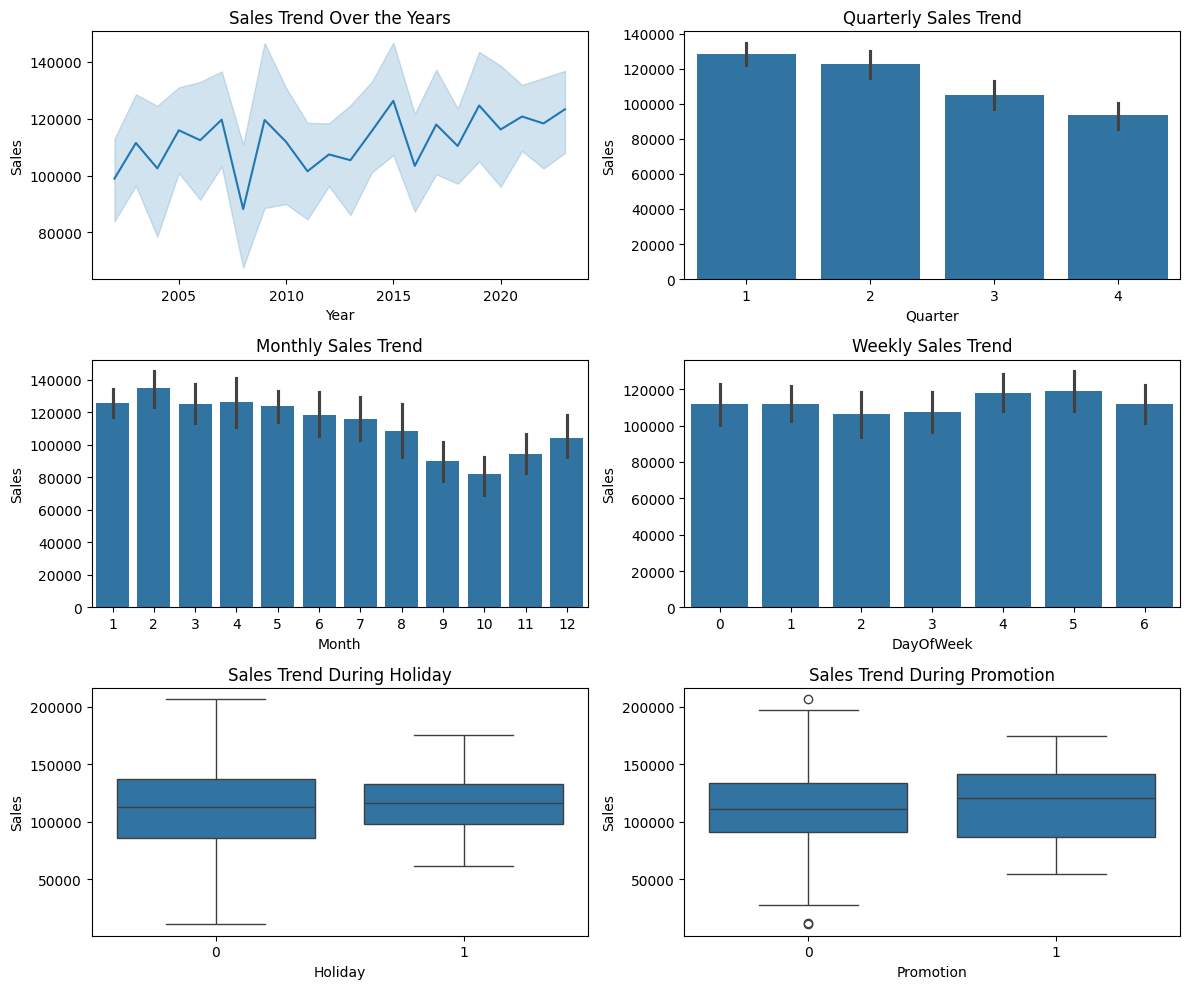

In [ ]:
# Bivariate Analysis: Numerical Variables

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Sales vs. Year
sns.lineplot(x='Year', y='Sales', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Sales Trend Over the Years')

# Sales vs. Quarter
sns.barplot(x='Quarter', y='Sales', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Quarterly Sales Trend')

# Sales vs Month
sns.barplot(x='Month', y='Sales', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Sales Trend')

# Sales vs. DayOfWeek
sns.barplot(x='DayOfWeek', y='Sales', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Weekly Sales Trend')

# Sales vs. Holiday
sns.boxplot(x='Holiday', y='Sales', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Sales Trend During Holiday')

# Sales vs. Promotion
sns.boxplot(x='Promotion', y='Sales', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Sales Trend During Promotion')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##Summary of the graphs

1. Sales Trend Over the Years (Line Plot): Shows how sales have changed over the years. The line's direction (increasing or decreasing) indicates the overall sales trend. Any noticeable spikes or dips represent periods of unusually high or low sales.

2. Quarterly Sales Trend (Bar Plot): Displays the average sales for each quarter of the year. It helps identify which quarters tend to have higher or lower sales compared to others. The 1st quarter have the highest sales and 4th quarter recorded the lowest sales

3. Monthly Sales Trend (Bar Plot): Shows the average sales for each month of the year. Similar to the quarterly trend, it helps identify any seasonal patterns or months with particularly high or low sales.

4. Weekly Sales Trend (Bar Plot): Displays the average sales for each day of the week. It helps determine if certain days tend to have higher sales compared to others, indicating potential weekly patterns.

5. Sales Trend During Holiday (Box Plot): Compares sales during holiday periods to non-holiday periods. The box plot elements (median, quartiles, outliers) provide insights into how sales are distributed and whether there are significant differences during holidays.

6. Sales Trend During Promotion (Box Plot): Compares sales during promotion periods to non-promotion periods. It helps understand the impact of promotions on sales volume and distribution.

These plots together provide a visual overview of the relationship between sales and various factors (time-based and event-based).



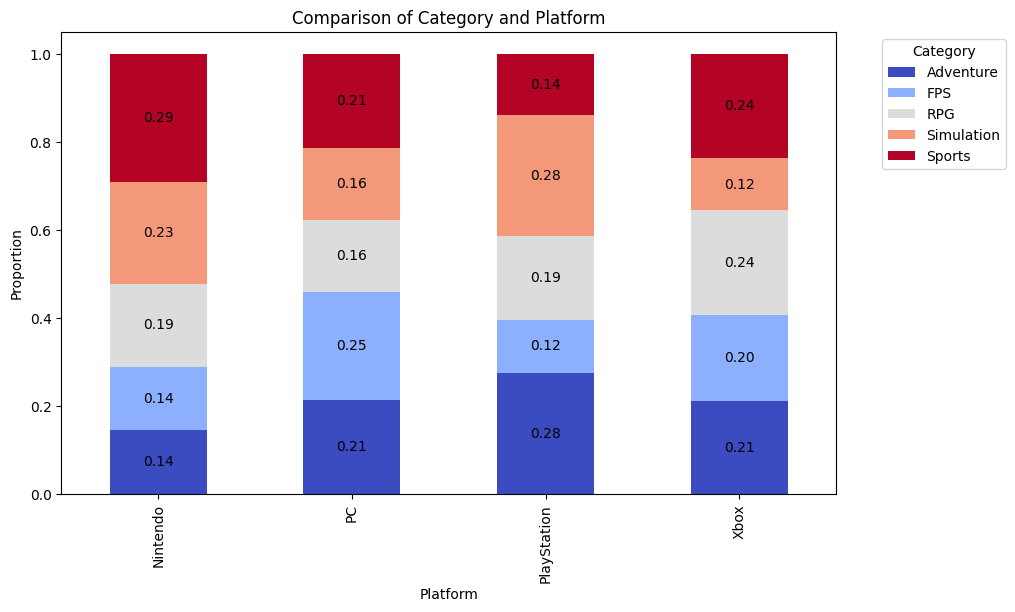

In [ ]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(data['Platform'], data['Category'], normalize='index')

# Plot the stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title('Comparison of Category and Platform')
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.legend(title='Category',loc='upper left',bbox_to_anchor=(1.05, 1))

# Add figures to the bars
for container in ax.containers:
    for rect in container.patches:
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        ax.text(x + width / 2,
                y + height / 2,
                '{:.2f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

Insights

Based on these observations,from the plot:

* Nintendo is the preferred platform for Sports games.

* PC is a strong contender for FPS games.

* PlayStation is dominant for Adventure and Simulation games.

while,

* Xbox is the preferred platform for PRG games.

These insights could inform marketing strategies, game development decisions, and platform targeting effort

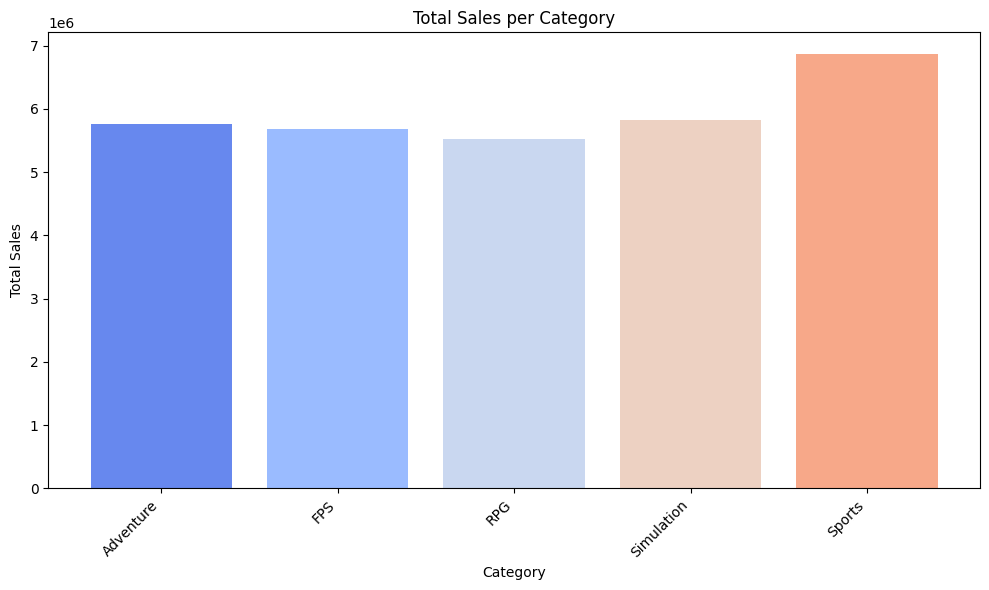

In [ ]:
plt.figure(figsize=(10, 6))

# Define Sales before using it
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

plt.bar(category_sales['Category'], category_sales['Sales'],color=sns.color_palette('coolwarm'))
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Insights:

The chart provides insights into customer preferences and market trends in the video game. It highlights the categories that are most popular and generate the most revenue.

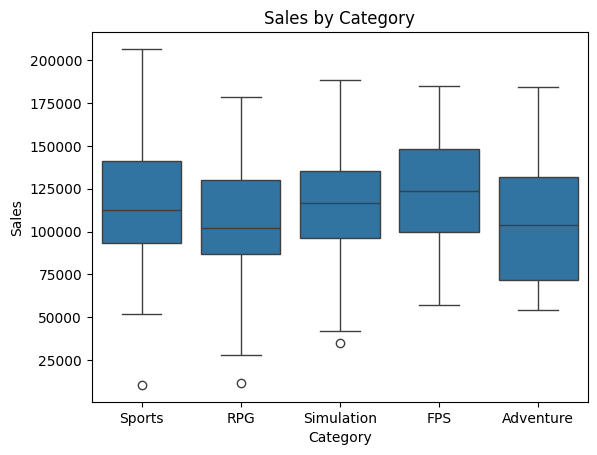

ANOVA F-value: 2.14, p-value: 0.076


In [ ]:
# Create a box plot
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Sales by Category')
plt.show()

# Perform ANOVA test
from scipy import stats
groups = data['Category'].unique()
fvalue, pvalue = stats.f_oneway(*[data['Sales'][data['Category'] == g] for g in groups])
print(f"ANOVA F-value: {fvalue:.2f}, p-value: {pvalue:.3f}")

## Insight:

* The box plot shows some visual differences in Sales between Categories, but the statistical test (ANOVA) is not entirely confident in declaring those differences to be significant.

* The p-value of 0.076 is slightly higher than the typical significance level of 0.05, so we would typically fail to reject the null hypothesis.

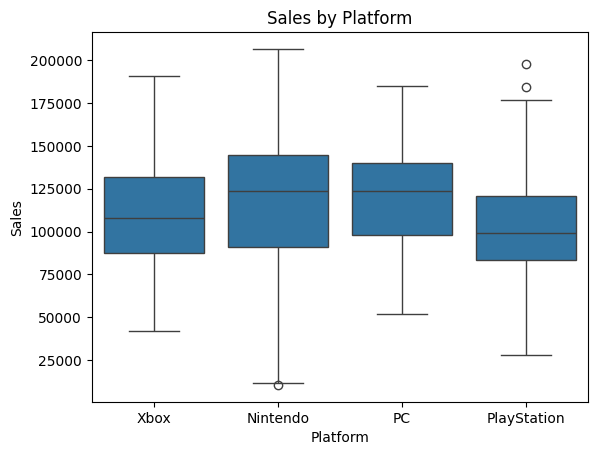

ANOVA F-value: 3.34, p-value: 0.020


In [ ]:
# Create a box plot
sns.boxplot(x='Platform', y='Sales', data=data)
plt.title('Sales by Platform')
plt.show()

# Perform ANOVA test
from scipy import stats
groups = data['Platform'].unique()
fvalue, pvalue = stats.f_oneway(*[data['Sales'][data['Platform'] == g] for g in groups])
print(f"ANOVA F-value: {fvalue:.2f}, p-value: {pvalue:.3f}")

Insight:

* The ANOVA results and box plot suggest that Sales are not the same across all Platform. There are likely some platforms where sales are significantly higher or lower compared to others based on category.

* The p-value of 0.020 is less than the typical significance level of 0.05, Therefore, we reject the null hypothesis.

## How do Sales vary by Category and Platform?

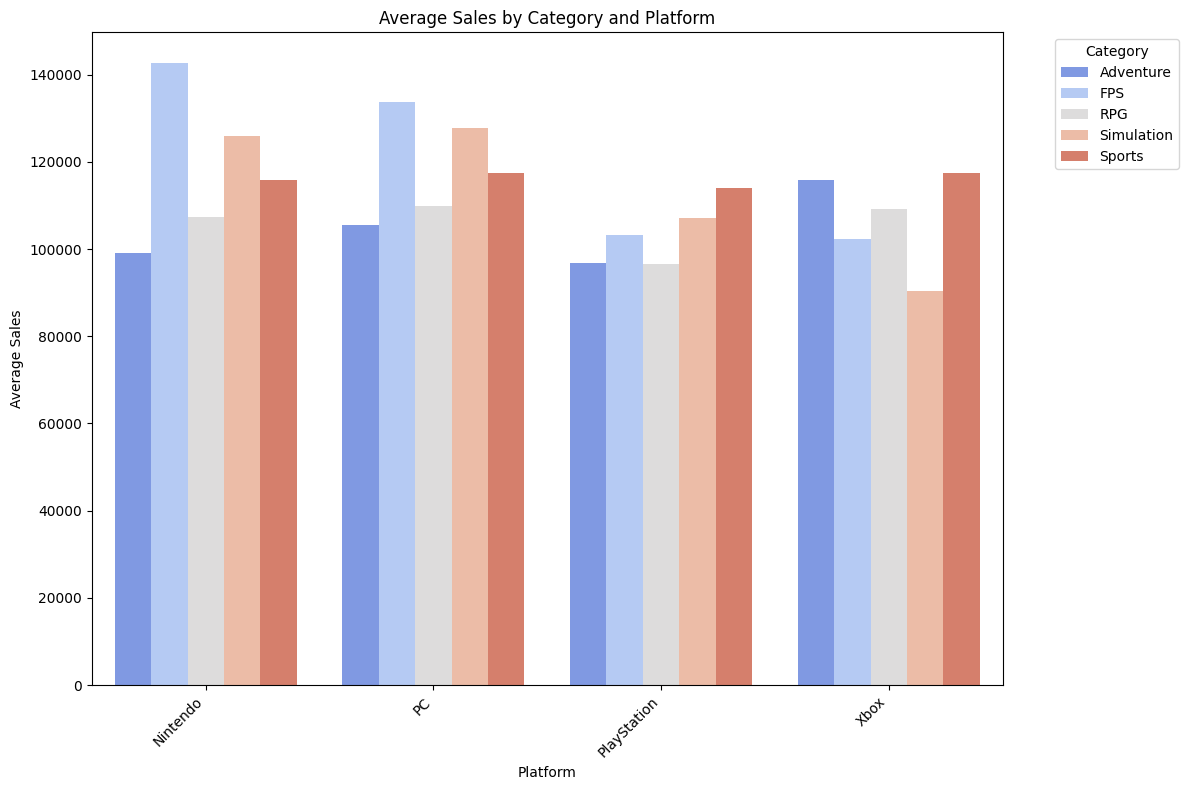

In [ ]:
# Group data by category and platform
category_platform_sales = data.groupby(['Platform', 'Category'])['Sales'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Sales', hue='Category', data=category_platform_sales, palette='coolwarm')
plt.title('Average Sales by Category and Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

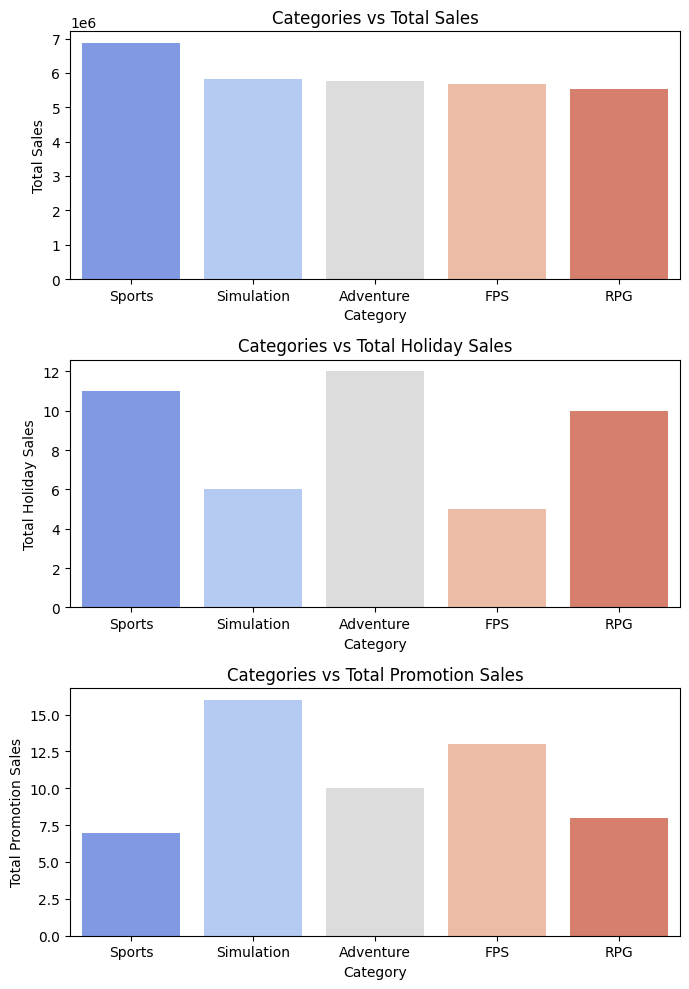

In [ ]:
category_data = data.groupby('Category').agg({
    'Sales': 'sum',
    'Holiday': 'sum',
    'Promotion': 'sum'}).reset_index()
category_data = category_data.sort_values(by='Sales', ascending=False)
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Categories vs Total Sales
sns.barplot(data=category_data, y='Sales',x='Category', ax=ax[0],palette='coolwarm')
ax[0].set_title('Categories vs Total Sales')
ax[0].set_ylabel('Total Sales')
ax[0].set_xlabel('Category')

# 'Categories vs Total Holiday Sales'
sns.barplot(data=category_data, y='Holiday',x='Category', ax=ax[1],palette='coolwarm')
ax[1].set_title('Categories vs Total Holiday Sales')
ax[1].set_ylabel('Total Holiday Sales')
ax[1].set_xlabel('Category')

# Products vs Total Quantity_score
sns.barplot(data=category_data, y='Promotion',x='Category', ax=ax[2],palette='coolwarm')
ax[2].set_title('Categories vs Total Promotion Sales')
ax[2].set_ylabel('Total Promotion Sales')
ax[2].set_xlabel('Category')

plt.tight_layout()
plt.show()

##Let check the total monthly sales for each category per platform

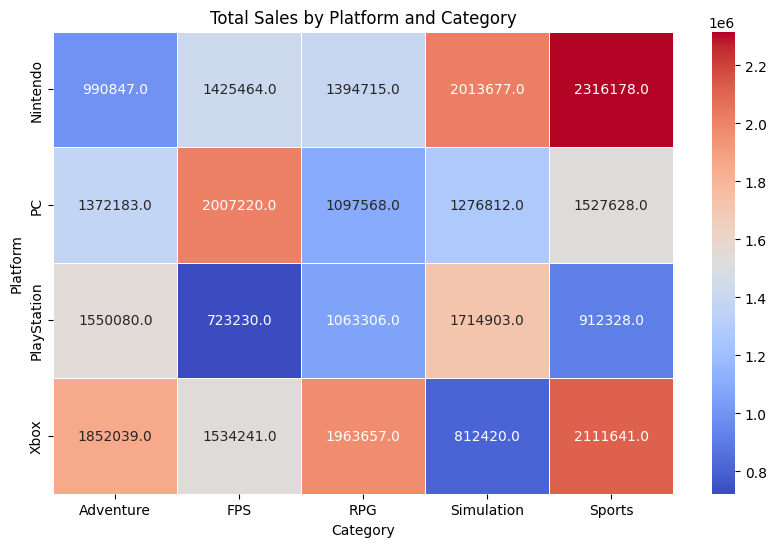

In [ ]:
# Total sales for each category and Platform
platform_data = data.groupby(['Platform', 'Category']).agg({
    'Sales': 'sum',
    'Holiday': 'sum',
    'Promotion': 'sum'}).reset_index()
platform_pivot = platform_data.pivot(index='Platform', columns='Category', values='Sales')

plt.figure(figsize=(10, 6))
sns.heatmap(platform_pivot, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5)
plt.title('Total Sales by Platform and Category')
plt.xlabel('Category')
plt.ylabel('Platform')
plt.show()

## How do Holidays and Promotions relate to the changes in Sales

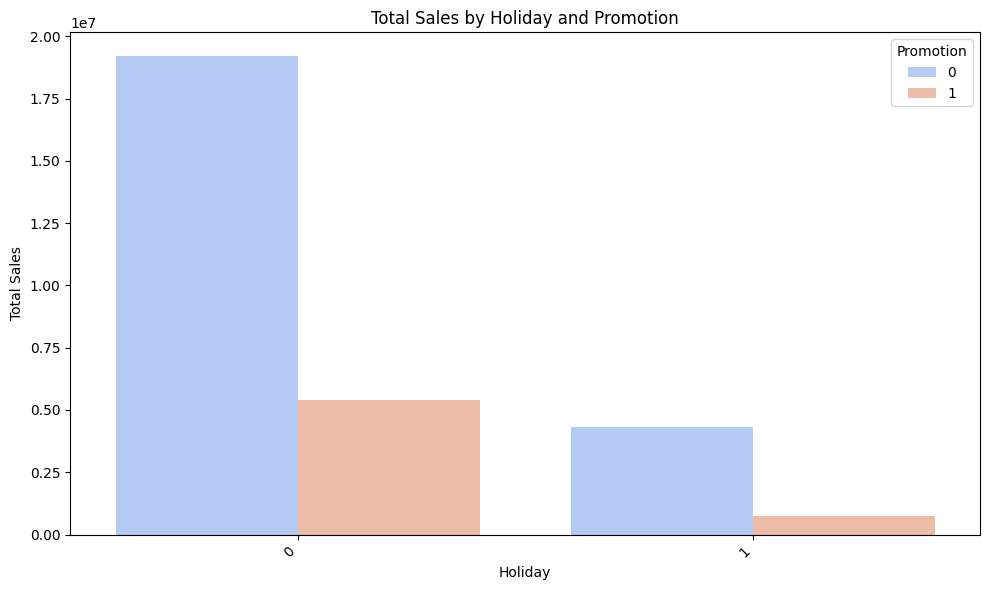

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4993
Date:                Sun, 12 Jan 2025   Prob (F-statistic):              0.683
Time:                        22:47:47   Log-Likelihood:                -3129.1
No. Observations:                 264   AIC:                             6266.
Df Residuals:                     260   BIC:                             6280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:

# Group data by holiday and promotion, calculating total monthly sales
holiday_promotion_sales = data.groupby(['Holiday', 'Promotion'])['Sales'].sum().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Sales', hue='Promotion', data=holiday_promotion_sales,  palette='coolwarm')
plt.title('Total Sales by Holiday and Promotion')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Promotion')
plt.tight_layout()
plt.show()

# Fit the two-way ANOVA model
model = smf.ols('Sales ~ C(Holiday) + C(Promotion) + C(Holiday):C(Promotion)', data=data).fit()

# Print the summary
print(model.summary())

RESULT;
1 represents a month with a major holiday.
0 represents a month without a major holiday.

* The baseline sales when neither holiday
  nor promotion is active,are approximately 111,000 units.

* During a holiday compared to no holiday, sales increase by 5.24%.

  The interval includes zero, indicating the holiday effect is not statistically significant p-value ( 0.349). This suggests holidays may not have a consistent or strong effect on sales.

* When a promotion is active compared to no promotion, sales increase by 3.64%

  The interval includes zero, and the p-value (0.474). indicates this effect is not statistically significant. Promotions may not consistently impact sales.

* The combined effect of a holiday and a promotion is -14.15% less than what would be expected from simply adding their individual effects. It suggest that sales might decrease by about -14.15%

  The wide interval includes zero, and the p-value (0.302) indicates the interaction effect is not statistically significant. There is no strong evidence that holidays and promotions interact meaningfully in influencing sales.





Based on this output, we can conclude the following:

* Neither holidays nor promotions alone significantly affect sales based on this data.

* There is no statistically significant interaction between holidays and promotions on sales.

* The lack of significance suggests that holidays and promotions individually or combined do not consistently drive changes in sales in this dataset.

## How the Sales vary with Category and Platform weekly

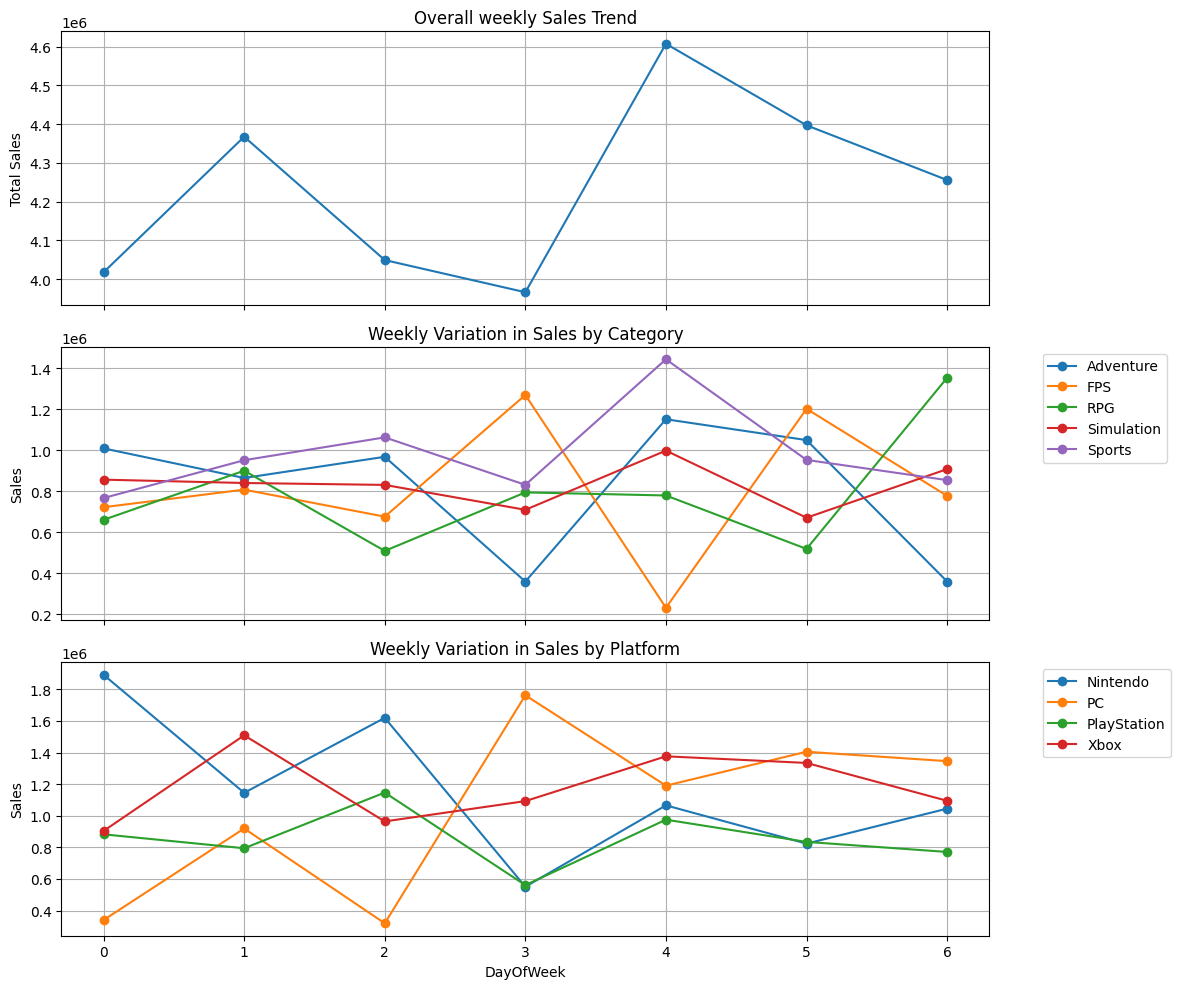

In [ ]:
# Group by week and sum sales for overall trend
weekly_sales = data.groupby('DayOfWeek')['Sales'].sum().reset_index()

# Group by category
category_sales = data.groupby(['DayOfWeek', 'Category'])['Sales'].sum().reset_index()

# Group by platform
platform_sales = data.groupby(['DayOfWeek', 'Platform'])['Sales'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot overall sales trend
axes[0].plot(weekly_sales['DayOfWeek'], weekly_sales['Sales'],marker='o')
axes[0].set_title('Overall weekly Sales Trend')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True)

# Plot sales breakdown by category
for category in category_sales['Category'].unique():
    subset = category_sales[category_sales['Category'] == category]
    axes[1].plot(subset['DayOfWeek'], subset['Sales'], label=category, marker='o')

axes[1].set_title('Weekly Variation in Sales by Category')
axes[1].set_ylabel('Sales')
axes[1].grid(True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot sales breakdown by platform
for platform in platform_sales['Platform'].unique():
    subset = platform_sales[platform_sales['Platform'] == platform]
    axes[2].plot(subset['DayOfWeek'], subset['Sales'], label=platform, marker='o')

axes[2].set_title('Weekly Variation in Sales by Platform')
axes[2].set_xlabel('DayOfWeek')
axes[2].set_ylabel('Sales')
axes[2].grid(True)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Day with Highest Sales: 4 (4607098.00)

Day with Lowest Sales: 3 (3966255.00)

## How the Sales vary with Category and Platform monthly

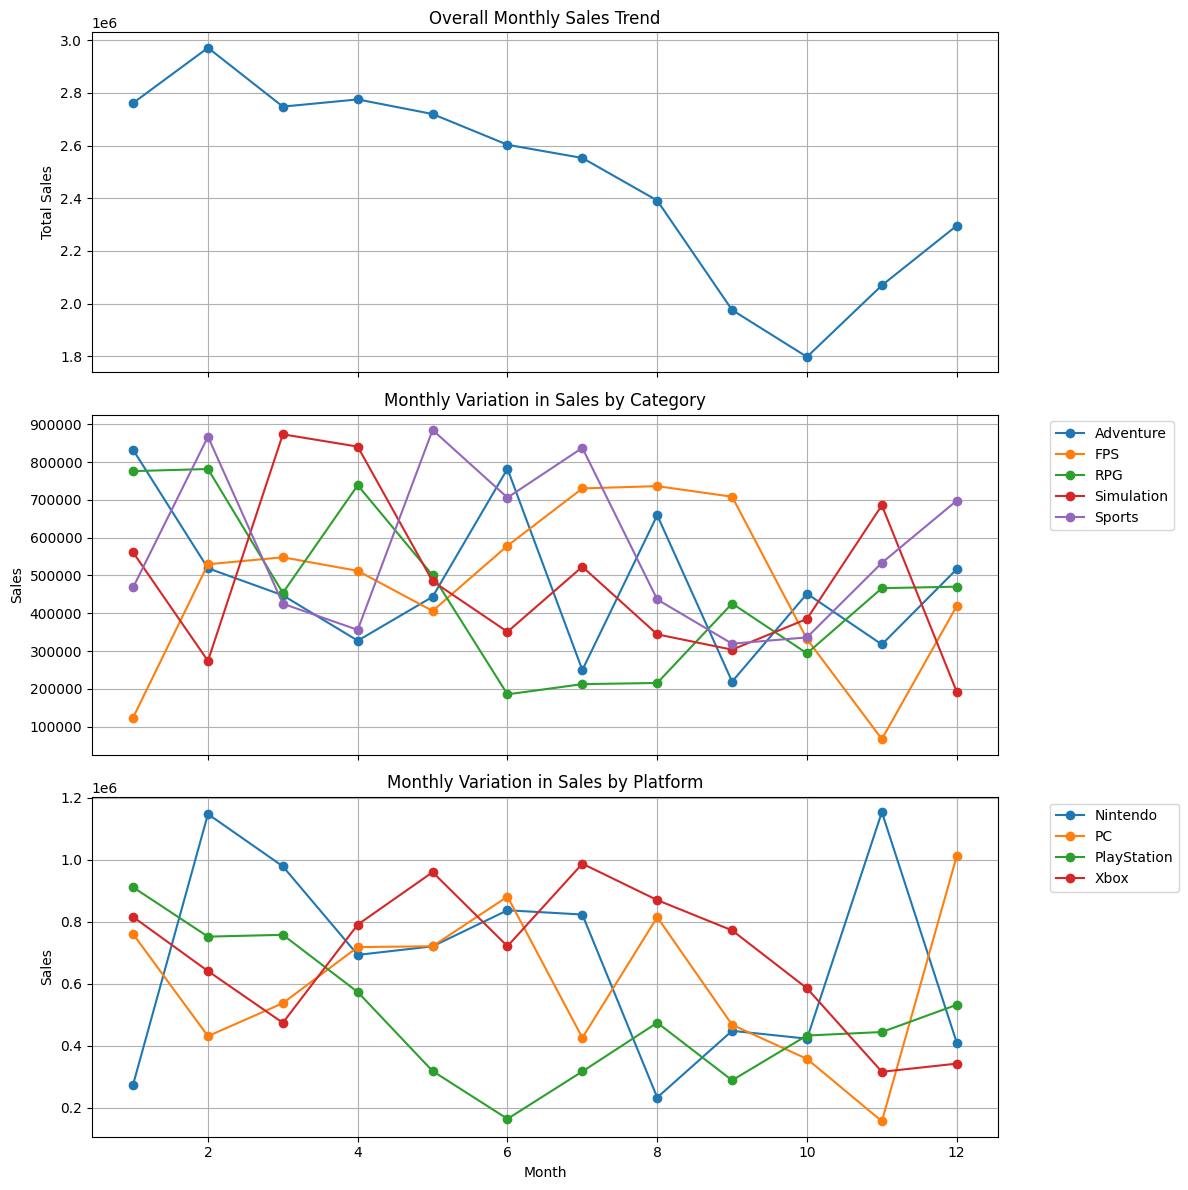

In [ ]:
# Group by month and sum sales for overall trend
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Group by category
category_sales = data.groupby(['Month', 'Category'])['Sales'].sum().reset_index()

# Group by platform
platform_sales = data.groupby(['Month', 'Platform'])['Sales'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot overall sales trend
axes[0].plot(monthly_sales['Month'], monthly_sales['Sales'],marker='o')
axes[0].set_title('Overall Monthly Sales Trend')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True)

# Plot sales breakdown by category
for category in category_sales['Category'].unique():
    subset = category_sales[category_sales['Category'] == category]
    axes[1].plot(subset['Month'], subset['Sales'], label=category, marker='o')

axes[1].set_title('Monthly Variation in Sales by Category')
axes[1].set_ylabel('Sales')
axes[1].grid(True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot sales breakdown by platform
for platform in platform_sales['Platform'].unique():
    subset = platform_sales[platform_sales['Platform'] == platform]
    axes[2].plot(subset['Month'], subset['Sales'], label=platform, marker='o')

axes[2].set_title('Monthly Variation in Sales by Platform')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Sales')
axes[2].grid(True)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

* The first plot shows the overall sales trend across all categories and platforms. It suggests fluctuations in sales across months

 * Month with Highest Sales is (2) Febuary, it started decline in march what happen in march?

 * Month with Lowest Sales is (10) October
  it pick up in november , what happen in november?

* The second plot breaks down sales by Category. Some categories, such as Simulation, may have higher sales during specific months compared to others

* The third plot shows the breakdown by Platform. Platforms like PlayStation and Nintendo may exhibit distinct patterns, potentially influenced by their respective market shares or promotional strategies.

#Sales during Holiday

Highest Sales Percentage during Holiday:
Platform: Xbox, Category: Adventure, Month: 1, Sales Percentage: 8.18%

Lowest Sales Percentage during Holiday:
Platform: Nintendo, Category: Adventure, Month: 12, Sales Percentage: 1.22%

Highest Sales Percentage during No Holiday:
Platform: Xbox, Category: RPG, Month: 4, Sales Percentage: 2.41%

Lowest Sales Percentage during No Holiday:
Platform: Nintendo, Category: RPG, Month: 10, Sales Percentage: 0.05%


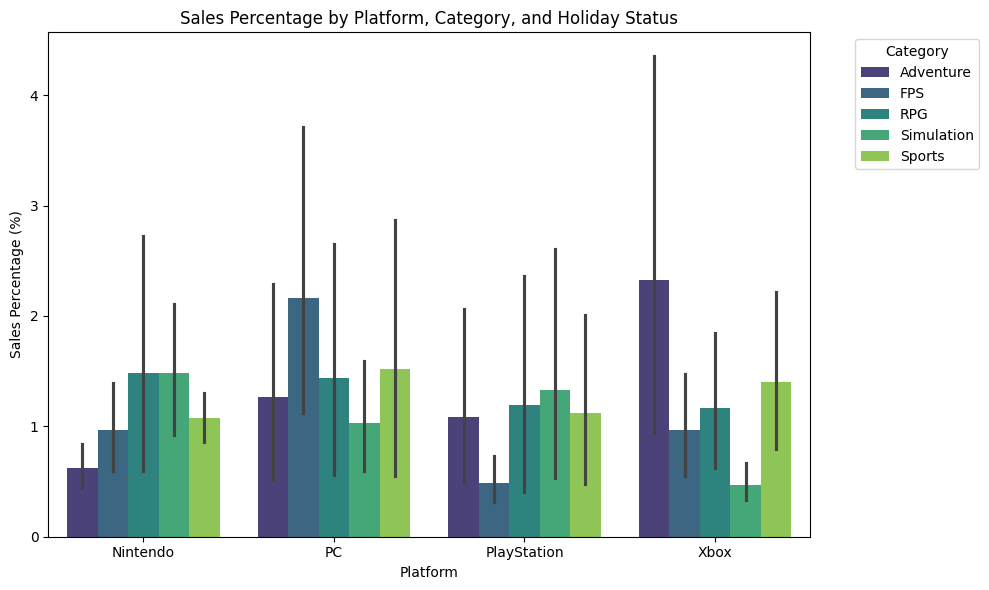

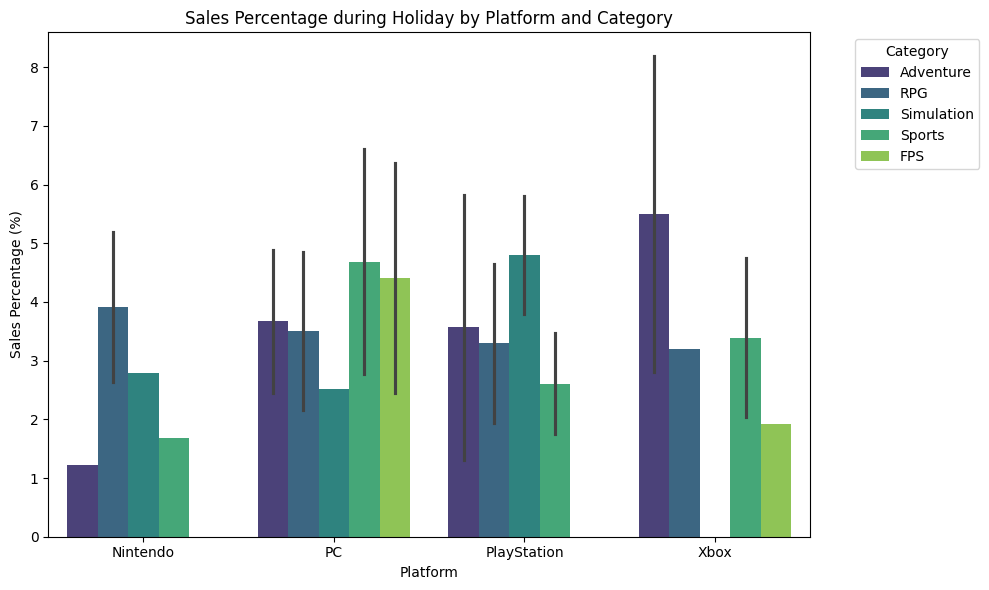

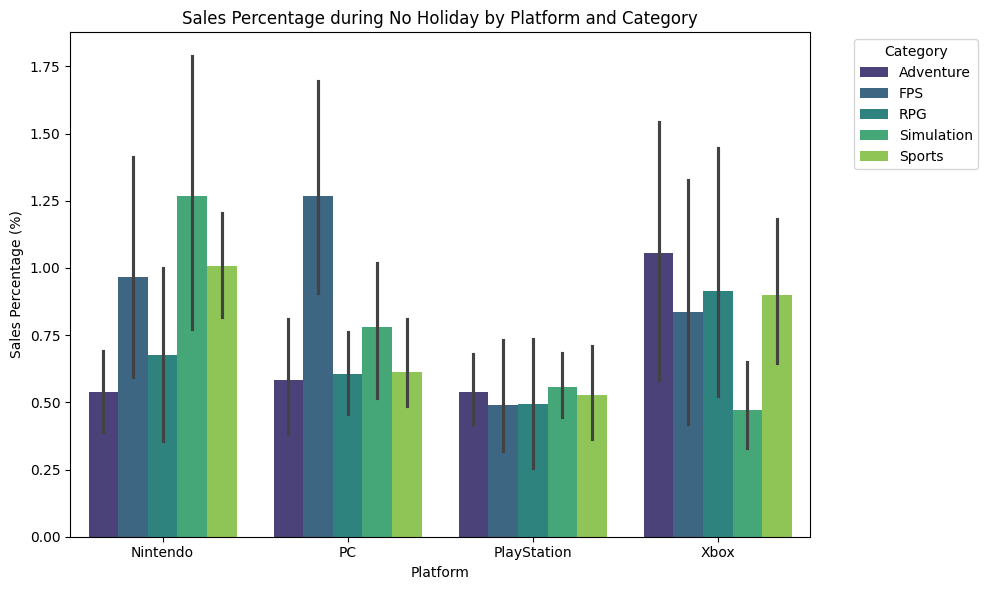

In [ ]:
# Group by holiday status, platform, category, and month, summing sales
grouped_sales = data.groupby(['Holiday', 'Platform', 'Category', 'Month'])['Sales'].sum().reset_index()

# Calculate total sales for each holiday status
total_sales_holiday = grouped_sales[grouped_sales['Holiday'] == 1]['Sales'].sum()
total_sales_no_holiday = grouped_sales[grouped_sales['Holiday'] == 0]['Sales'].sum()

# Calculate percentage of sales for each group
grouped_sales['Sales Percentage'] = grouped_sales.apply(
    lambda row: (row['Sales'] / total_sales_holiday) * 100 if row['Holiday'] == 1 else (row['Sales'] / total_sales_no_holiday) * 100,
    axis=1
)

# Find highest and lowest sales percentages for holiday and no holiday
highest_sales_holiday = grouped_sales[grouped_sales['Holiday'] == 1].loc[grouped_sales[grouped_sales['Holiday'] == 1]['Sales Percentage'].idxmax()]
lowest_sales_holiday = grouped_sales[grouped_sales['Holiday'] == 1].loc[grouped_sales[grouped_sales['Holiday'] == 1]['Sales Percentage'].idxmin()]
highest_sales_no_holiday = grouped_sales[grouped_sales['Holiday'] == 0].loc[grouped_sales[grouped_sales['Holiday'] == 0]['Sales Percentage'].idxmax()]
lowest_sales_no_holiday = grouped_sales[grouped_sales['Holiday'] == 0].loc[grouped_sales[grouped_sales['Holiday'] == 0]['Sales Percentage'].idxmin()]

# Print the results
print("Highest Sales Percentage during Holiday:")
print(f"Platform: {highest_sales_holiday['Platform']}, Category: {highest_sales_holiday['Category']}, Month: {highest_sales_holiday['Month']}, Sales Percentage: {highest_sales_holiday['Sales Percentage']:.2f}%")

print("\nLowest Sales Percentage during Holiday:")
print(f"Platform: {lowest_sales_holiday['Platform']}, Category: {lowest_sales_holiday['Category']}, Month: {lowest_sales_holiday['Month']}, Sales Percentage: {lowest_sales_holiday['Sales Percentage']:.2f}%")

print("\nHighest Sales Percentage during No Holiday:")
print(f"Platform: {highest_sales_no_holiday['Platform']}, Category: {highest_sales_no_holiday['Category']}, Month: {highest_sales_no_holiday['Month']}, Sales Percentage: {highest_sales_no_holiday['Sales Percentage']:.2f}%")

print("\nLowest Sales Percentage during No Holiday:")
print(f"Platform: {lowest_sales_no_holiday['Platform']}, Category: {lowest_sales_no_holiday['Category']}, Month: {lowest_sales_no_holiday['Month']}, Sales Percentage: {lowest_sales_no_holiday['Sales Percentage']:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales, palette='viridis')
plt.title('Sales Percentage by Platform, Category, and Holiday Status')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Separate visualizations for holiday and no holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales[grouped_sales['Holiday'] == 1], palette='viridis')
plt.title('Sales Percentage during Holiday by Platform and Category')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales[grouped_sales['Holiday'] == 0], palette='viridis')
plt.title('Sales Percentage during No Holiday by Platform and Category')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Recommendations:

1. Holiday Season:

Focus on Xbox during the holiday season, particularly in January (Month 1), and capitalize on the strong performance of the Adventure category. This combination generated the highest sales percentage during holidays, indicating a potential sweet spot for maximizing revenue.

Consider minimizing or adjusting promotional efforts for Nintendo during the holiday season, especially in December (Month 12), within the Adventure category. This combination had the lowest sales percentage during holidays, suggesting it might not be the most effective area to allocate resources.

2. Non-Holiday Periods:

Prioritize Xbox in April (Month 4), emphasizing the RPG category, during non-holiday periods. This combination yielded the highest sales percentage when there were no holidays, indicating a potential for capturing market share during those times.

Evaluate and potentially adjust strategies for Nintendo during non-holiday periods, especially in October (Month 10), within the RPG category. This combination had the lowest sales percentage without holidays, suggesting a need for a revised approach.

3. Overall Strategy:

Leverage Xbox's strengths throughout the year, tailoring promotional efforts to specific months and categories. The report consistently highlights Xbox's strong performance, particularly within the Adventure and RPG categories.

Carefully assess promotional strategies for Nintendo, considering alternative approaches, such as focusing on different categories or platforms. The report indicates lower sales percentages for Nintendo in certain scenarios, prompting a need for strategic adjustments.

Conduct further analysis to understand the reasons behind these trends and identify opportunities for improvement. A deeper dive into customer preferences, market dynamics, and competitor strategies could provide valuable insights for refining promotional plans.

Key Takeaways:

Xbox appears to be a consistent performer, particularly during holidays and within the Adventure and RPG categories.

Nintendo faces challenges in certain categories and months, requiring strategic adjustments.

A combination of platform-specific, category-focused, and time-sensitive promotions is recommended for maximizing sales throughout the year.

Highest Sales Percentage during Promotion:
Platform: Nintendo, Category: FPS, Month: 7, Sales Percentage: 5.11%

Lowest Sales Percentage during Promotion:
Platform: PlayStation, Category: Adventure, Month: 9, Sales Percentage: 0.88%

Highest Sales Percentage during No Promotion:
Platform: Xbox, Category: RPG, Month: 4, Sales Percentage: 2.52%

Lowest Sales Percentage during No Promotion:
Platform: Nintendo, Category: RPG, Month: 10, Sales Percentage: 0.05%


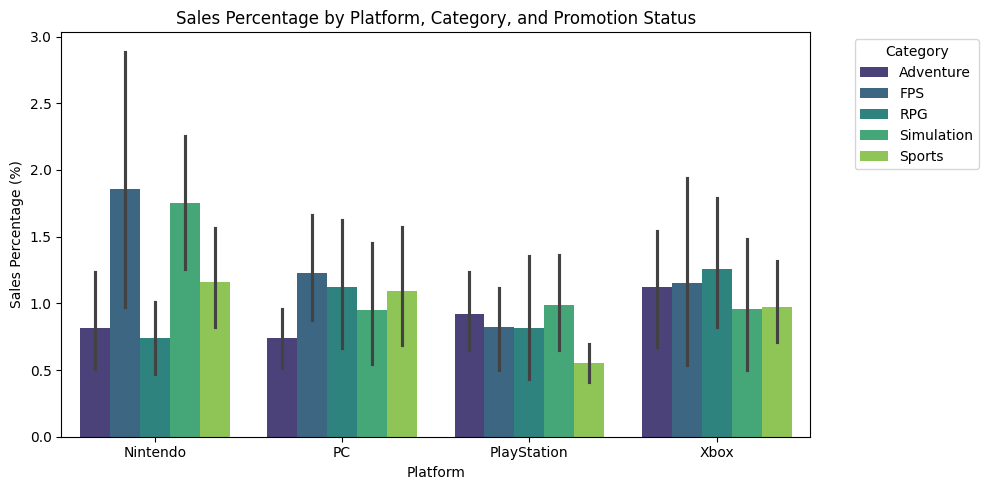

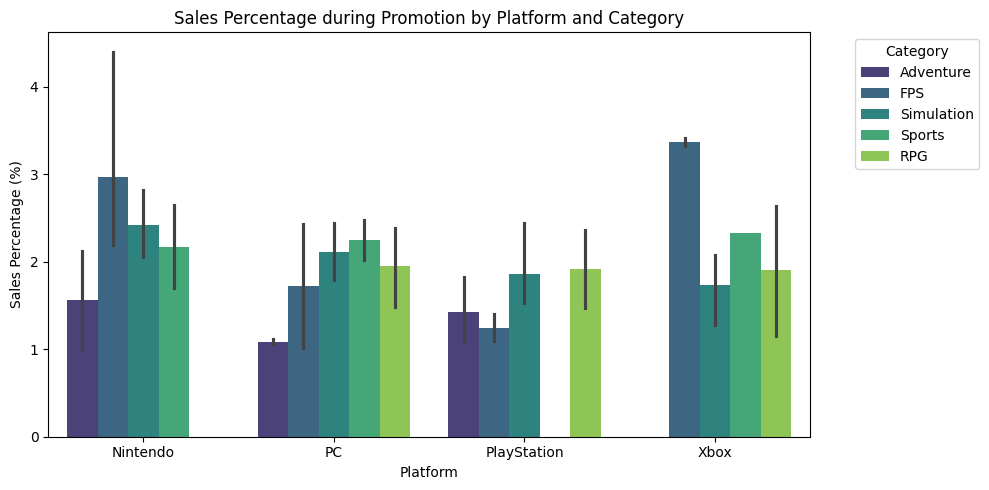

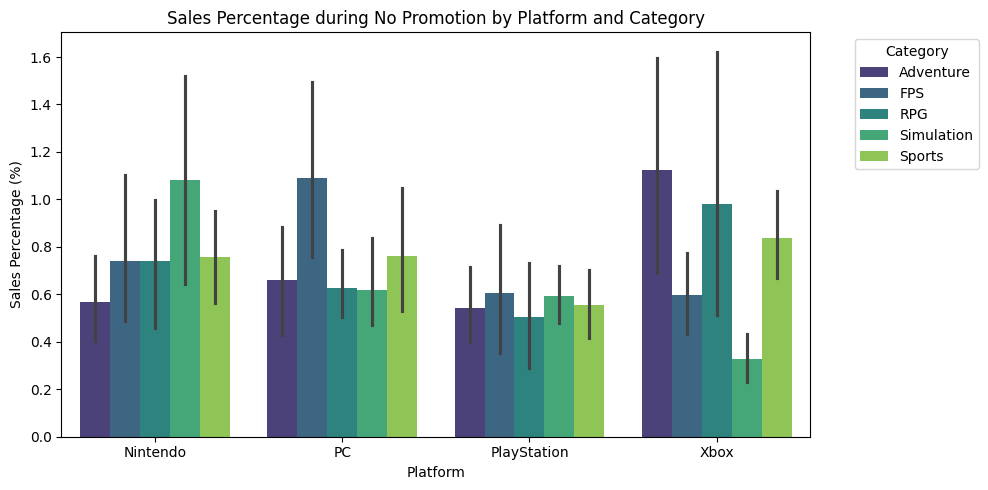

In [ ]:
# Group by promotion status, platform, category, and month, summing sales
grouped_sales = data.groupby(['Promotion', 'Platform', 'Category', 'Month'])['Sales'].sum().reset_index()

# Calculate total sales for each promotion status
total_sales_promotion = grouped_sales[grouped_sales['Promotion'] == 1]['Sales'].sum()
total_sales_no_promotion = grouped_sales[grouped_sales['Promotion'] == 0]['Sales'].sum()

# Calculate percentage of sales for each group
grouped_sales['Sales Percentage'] = grouped_sales.apply(
    lambda row: (row['Sales'] / total_sales_promotion) * 100 if row['Promotion'] == 1 else (row['Sales'] / total_sales_no_promotion) * 100,
    axis=1
)

# Find highest and lowest sales percentages for promotion and no promotion
highest_sales_promotion = grouped_sales[grouped_sales['Promotion'] == 1].loc[grouped_sales[grouped_sales['Promotion'] == 1]['Sales Percentage'].idxmax()]
lowest_sales_promotion = grouped_sales[grouped_sales['Promotion'] == 1].loc[grouped_sales[grouped_sales['Promotion'] == 1]['Sales Percentage'].idxmin()]
highest_sales_no_promotion = grouped_sales[grouped_sales['Promotion'] == 0].loc[grouped_sales[grouped_sales['Promotion'] == 0]['Sales Percentage'].idxmax()]
lowest_sales_no_promotion = grouped_sales[grouped_sales['Promotion'] == 0].loc[grouped_sales[grouped_sales['Promotion'] == 0]['Sales Percentage'].idxmin()]

# Print the results
print("Highest Sales Percentage during Promotion:")
print(f"Platform: {highest_sales_promotion['Platform']}, Category: {highest_sales_promotion['Category']}, Month: {highest_sales_promotion['Month']}, Sales Percentage: {highest_sales_promotion['Sales Percentage']:.2f}%")

print("\nLowest Sales Percentage during Promotion:")
print(f"Platform: {lowest_sales_promotion['Platform']}, Category: {lowest_sales_promotion['Category']}, Month: {lowest_sales_promotion['Month']}, Sales Percentage: {lowest_sales_promotion['Sales Percentage']:.2f}%")

print("\nHighest Sales Percentage during No Promotion:")
print(f"Platform: {highest_sales_no_promotion['Platform']}, Category: {highest_sales_no_promotion['Category']}, Month: {highest_sales_no_promotion['Month']}, Sales Percentage: {highest_sales_no_promotion['Sales Percentage']:.2f}%")

print("\nLowest Sales Percentage during No Promotion:")
print(f"Platform: {lowest_sales_no_promotion['Platform']}, Category: {lowest_sales_no_promotion['Category']}, Month: {lowest_sales_no_promotion['Month']}, Sales Percentage: {lowest_sales_no_promotion['Sales Percentage']:.2f}%")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales, palette='viridis')
plt.title('Sales Percentage by Platform, Category, and Promotion Status')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Separate visualizations for promotion and no promotion
plt.figure(figsize=(10, 5))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales[grouped_sales['Promotion'] == 1], palette='viridis')
plt.title('Sales Percentage during Promotion by Platform and Category')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales[grouped_sales['Promotion'] == 0], palette='viridis')
plt.title('Sales Percentage during No Promotion by Platform and Category')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Okay, let's formulate recommendations for the company based on the provided report, focusing on promotional strategies:

Recommendations:

1. Promotions:

Prioritize Nintendo during promotional periods, particularly in July (Month 7), focusing on the FPS category. This combination achieved the highest sales percentage during promotions, indicating a strong potential for driving sales.

Minimize or carefully re-evaluate promotional efforts for PlayStation during promotions, especially in September (Month 9), within the Adventure category. This combination had the lowest sales percentage during promotions, suggesting it might not be the most effective use of resources.

2. Non-Promotional Periods:

Leverage Xbox's strength in April (Month 4), focusing on the RPG category, during non-promotional periods. This combination yielded the highest sales percentage without promotions, indicating a potential for capturing market share.

Evaluate and potentially adjust strategies for Nintendo during non-promotional periods, especially in October (Month 10), within the RPG category. This combination had the lowest sales percentage without promotions, suggesting a need for a revised approach.

3. Overall Strategy:

Capitalize on Nintendo's promotional strength in July, aligning promotions with the FPS category. The report suggests that Nintendo's promotions have a significant impact during this period, particularly for FPS games.

Carefully consider PlayStation's promotional performance, potentially focusing on different categories or timing promotions strategically. The report indicates lower sales percentages for PlayStation during specific promotional periods, prompting a need for strategic adjustments.

Leverage Xbox's non-promotional strength in April, emphasizing the RPG category. The report highlights Xbox's ability to maintain sales without promotions, particularly for RPG games, during this period.

Assess and adjust strategies for Nintendo during non-promotional periods, particularly in October, within the RPG category. The report indicates low sales percentages for Nintendo in this scenario, suggesting a need for a revised approach.

Key Takeaways:

Nintendo excels during promotional periods, particularly in July, within the FPS category.

PlayStation might require alternative promotional approaches, focusing on different categories or timing promotions differently.

Xbox demonstrates strength during non-promotional periods, especially in April, within the RPG category.

Nintendo's strategies during non-promotional periods, particularly in October, need a careful evaluation and potentially a revised approach, especially for RPG games.

#Sales Percentage during Promotion and Holiday

Highest Sales Percentage during Promotion and Holiday:
Platform: PlayStation, Category: Simulation, Month: 1, Sales Percentage: 22.51%

Lowest Sales Percentage during Promotion and Holiday:
Platform: Nintendo, Category: Adventure, Month: 12, Sales Percentage: 8.37%


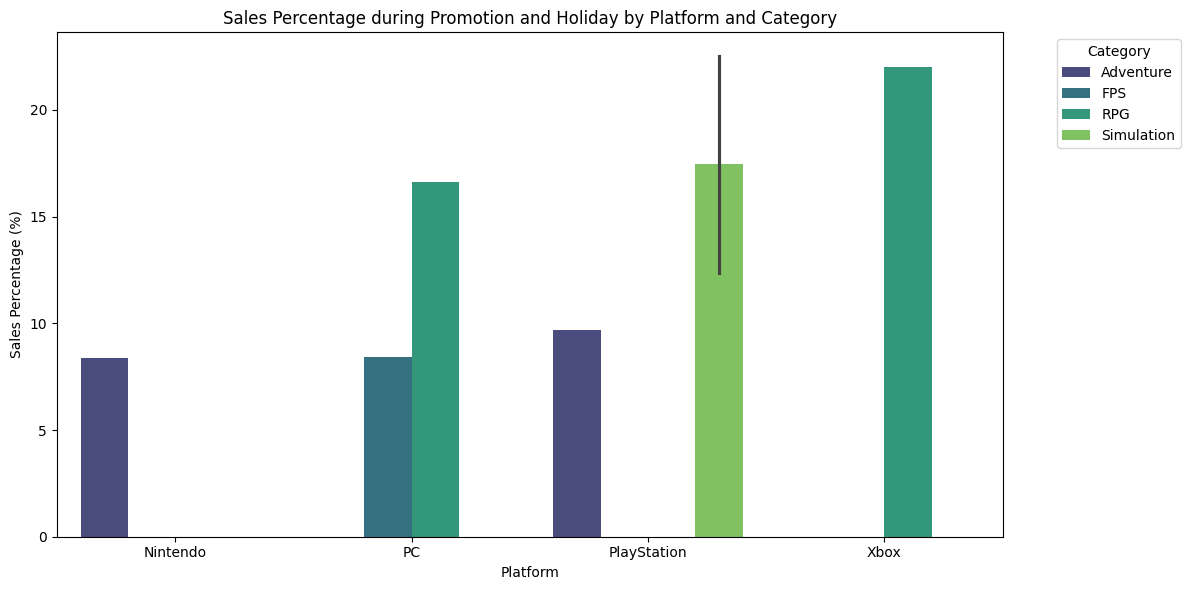

In [ ]:
# Filter data for promotion and holiday periods
promotion_holiday_data = data[(data['Promotion'] == 1) & (data['Holiday'] == 1)]

# Group by platform, category, and month, summing sales
grouped_sales = promotion_holiday_data.groupby(['Platform', 'Category', 'Month'])['Sales'].sum().reset_index()

# Calculate total sales during promotion and holiday
total_sales_promotion_holiday = promotion_holiday_data['Sales'].sum()

# Calculate percentage of sales for each group
grouped_sales['Sales Percentage'] = (grouped_sales['Sales'] / total_sales_promotion_holiday) * 100

# Find highest and lowest sales percentages
highest_sales = grouped_sales.loc[grouped_sales['Sales Percentage'].idxmax()]
lowest_sales = grouped_sales.loc[grouped_sales['Sales Percentage'].idxmin()]

# Print the results
print("Highest Sales Percentage during Promotion and Holiday:")
print(f"Platform: {highest_sales['Platform']}, Category: {highest_sales['Category']}, Month: {highest_sales['Month']}, Sales Percentage: {highest_sales['Sales Percentage']:.2f}%")

print("\nLowest Sales Percentage during Promotion and Holiday:")
print(f"Platform: {lowest_sales['Platform']}, Category: {lowest_sales['Category']}, Month: {lowest_sales['Month']}, Sales Percentage: {lowest_sales['Sales Percentage']:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Sales Percentage', hue='Category', data=grouped_sales, palette='viridis')
plt.title('Sales Percentage during Promotion and Holiday by Platform and Category')
plt.xlabel('Platform')
plt.ylabel('Sales Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Recommendations:

1. Promotions and Holidays:

Prioritize PlayStation during promotions and holidays, specifically in January (Month 1), focusing on the Simulation category. This combination generated the highest sales percentage during the combined influence of promotions and holidays, indicating a significant opportunity for revenue generation.

Carefully evaluate and potentially adjust strategies for Nintendo during promotions and holidays, particularly in December (Month 12), within the Adventure category. This combination had the lowest sales percentage during this period, suggesting it might not be the most effective area to allocate resources.

2. Overall Strategy:

Capitalize on PlayStation's strength during promotions and holidays in January, aligning promotions with the Simulation category. The report highlights PlayStation's exceptional performance during this specific period, particularly for Simulation games. This combination holds the greatest potential for maximizing sales during promotions and holidays.

Reassess promotional and holiday strategies for Nintendo, considering alternative approaches, such as focusing on different categories or timing promotions differently. The report indicates lower sales percentages for Nintendo in certain scenarios during promotions and holidays, particularly for Adventure games in December. This suggests a need for a revised approach to maximize sales during this period.

Key Takeaways:

PlayStation excels during promotions and holidays in January, especially within the Simulation category. This combination offers a prime opportunity for driving sales and capturing market share.

Nintendo's performance during promotions and holidays needs a careful evaluation and potential adjustments, particularly for Adventure games in December. Strategic changes are needed to improve sales during this period.


In [ ]:
# Group by promotion status and month, summing sales
grouped_sales = data.groupby(['Promotion', 'Month'])['Sales'].sum().reset_index()

# Filter for promotion and non-promotion periods
promotion_sales = grouped_sales[grouped_sales['Promotion'] == 1]
no_promotion_sales = grouped_sales[grouped_sales['Promotion'] == 0]

# Find the month with the highest sales during promotion
highest_sales_promotion_month = promotion_sales.loc[promotion_sales['Sales'].idxmax()]['Month']

# Find the month with the lowest sales during no promotion
lowest_sales_no_promotion_month = no_promotion_sales.loc[no_promotion_sales['Sales'].idxmin()]['Month']

# Print the recommended month
print(f"Recommended month for promotion: {highest_sales_promotion_month if highest_sales_promotion_month == lowest_sales_no_promotion_month else 'Consider both ' + str(highest_sales_promotion_month) + ' and ' + str(lowest_sales_no_promotion_month)}")


Recommended month for promotion: 7


#Reasoning:

Grouping and Filtering: The code groups sales data by Promotion and Month, then filters for promotion and non-promotion periods.

Identifying Key Months: It identifies the month with the highest sales during promotions and the month with the lowest sales without promotions.

Recommendation: If both months are the same, it's recommended as the optimal month for promotions. If they differ, it suggests considering both months for promotional activities.

#Interpreting the results:

Recommended month: The output provides the month identified as the most favorable for promotions.

Multiple months: If the output suggests considering multiple months, it indicates that promotions could be beneficial in either of those months, potentially with different strategies tailored to the specific month's sales patterns.


## How the Sales vary with Category and Platform yearly


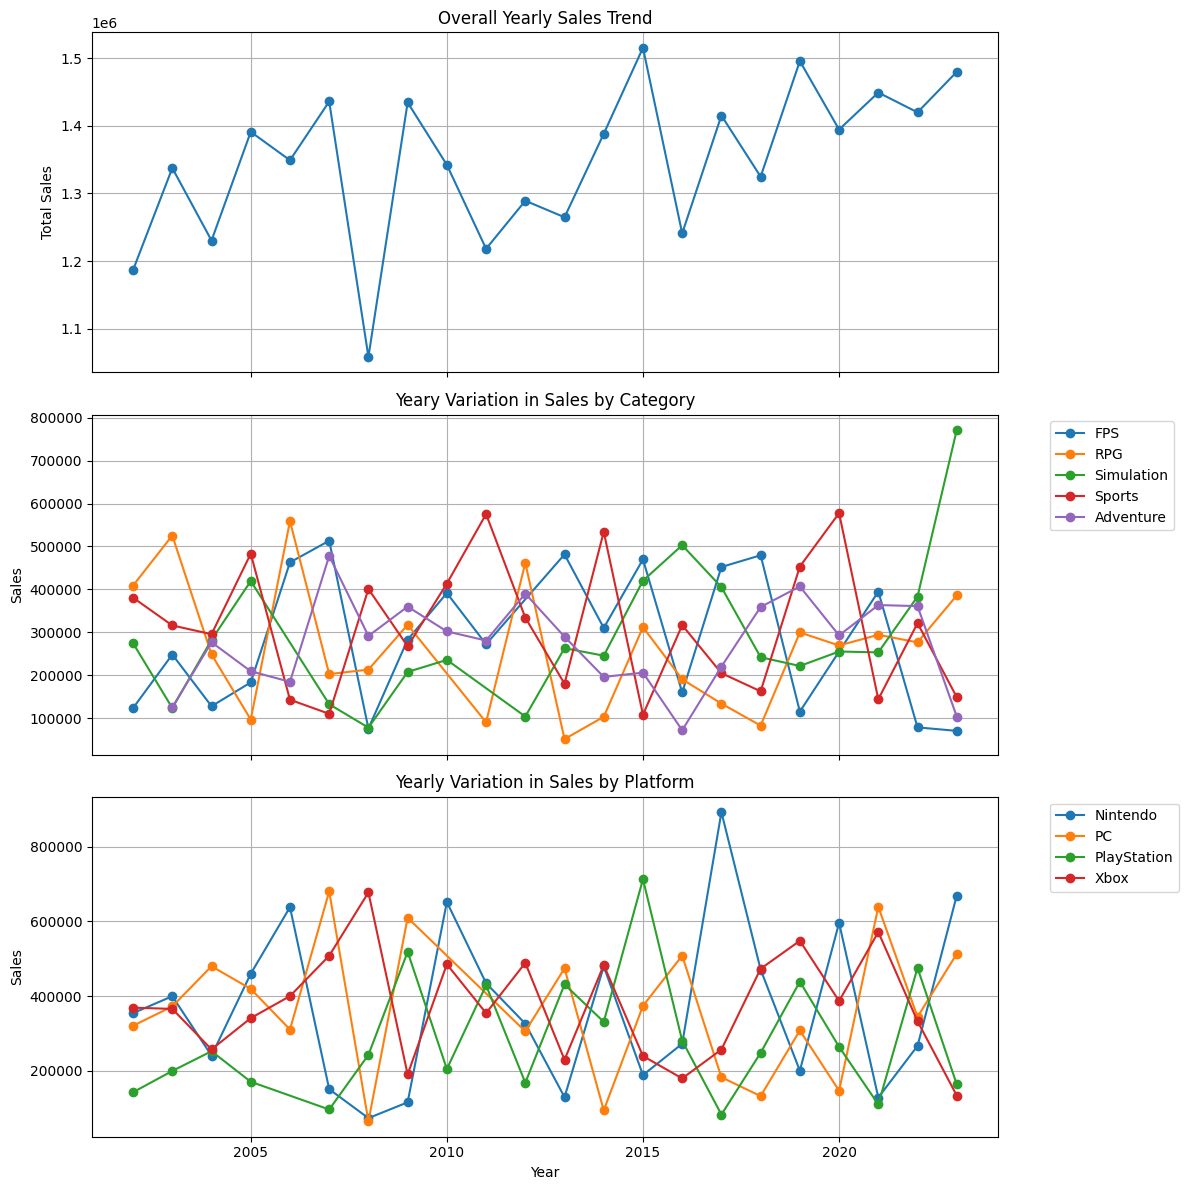

In [ ]:
# Group by year and sum sales for overall trend
monthly_sales = data.groupby('Year')['Sales'].sum().reset_index()

# Group by year and category
category_sales = data.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Group by year and platform
platform_sales = data.groupby(['Year', 'Platform'])['Sales'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot overall sales trend
axes[0].plot(monthly_sales['Year'], monthly_sales['Sales'],marker='o')
axes[0].set_title('Overall Yearly Sales Trend')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True)

# Plot sales breakdown by category
for category in category_sales['Category'].unique():
    subset = category_sales[category_sales['Category'] == category]
    axes[1].plot(subset['Year'], subset['Sales'], label=category, marker='o')

axes[1].set_title('Yeary Variation in Sales by Category')
axes[1].set_ylabel('Sales')
axes[1].grid(True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot sales breakdown by platform
for platform in platform_sales['Platform'].unique():
    subset = platform_sales[platform_sales['Platform'] == platform]
    axes[2].plot(subset['Year'], subset['Sales'], label=platform, marker='o')

axes[2].set_title('Yearly Variation in Sales by Platform')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Sales')
axes[2].grid(True)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The highest sales were recorded in year 2015 and
lowerest sales in 2008

##Decompose the time series to examine trend and seasonality

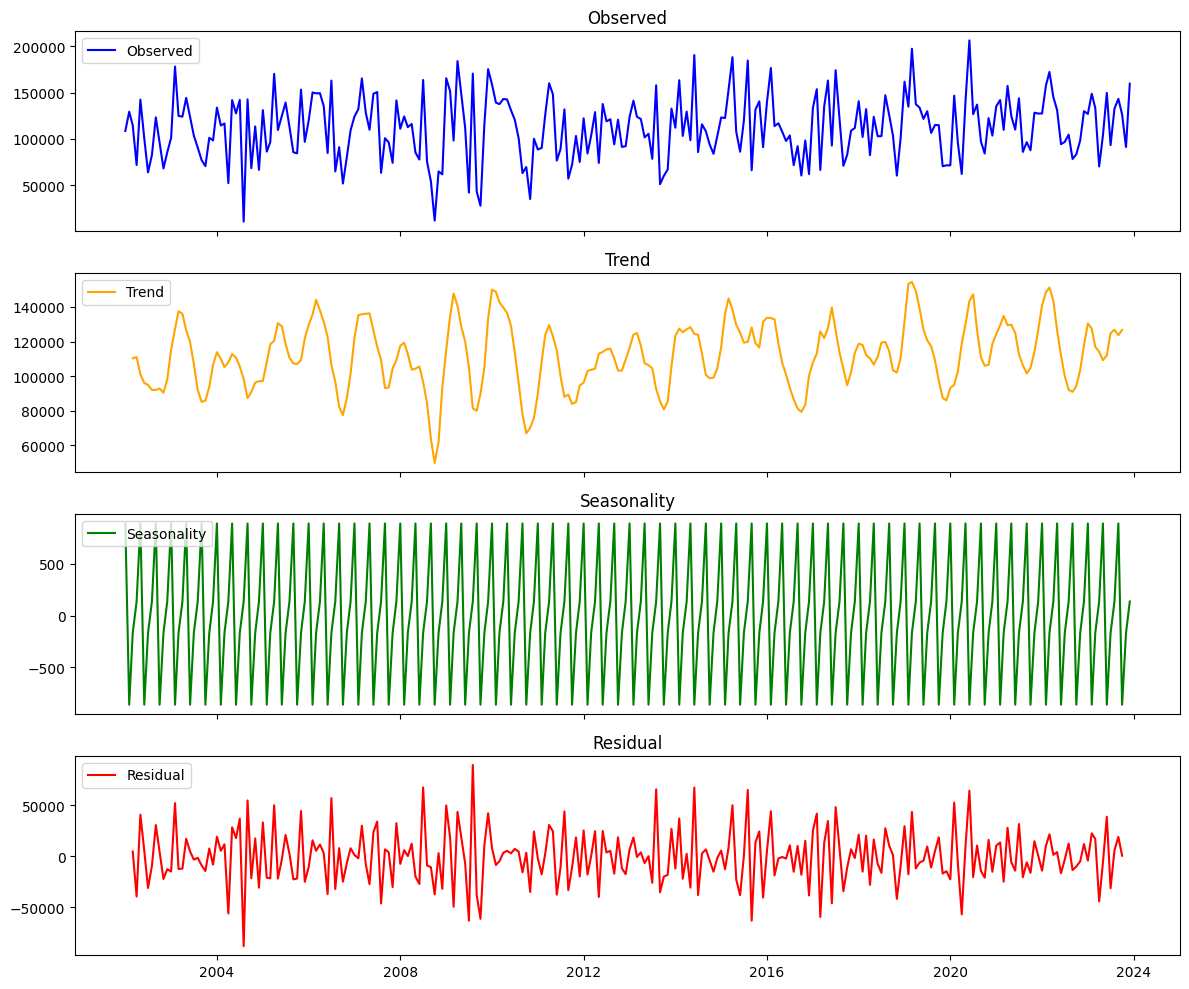

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

time_series = data['Sales']

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=4)

# Plot decomposition components
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

# Trend
axes[1].plot(decomposition.trend, label='Trend', color='orange')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Seasonal
axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonality')

# Residual
axes[3].plot(decomposition.resid, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

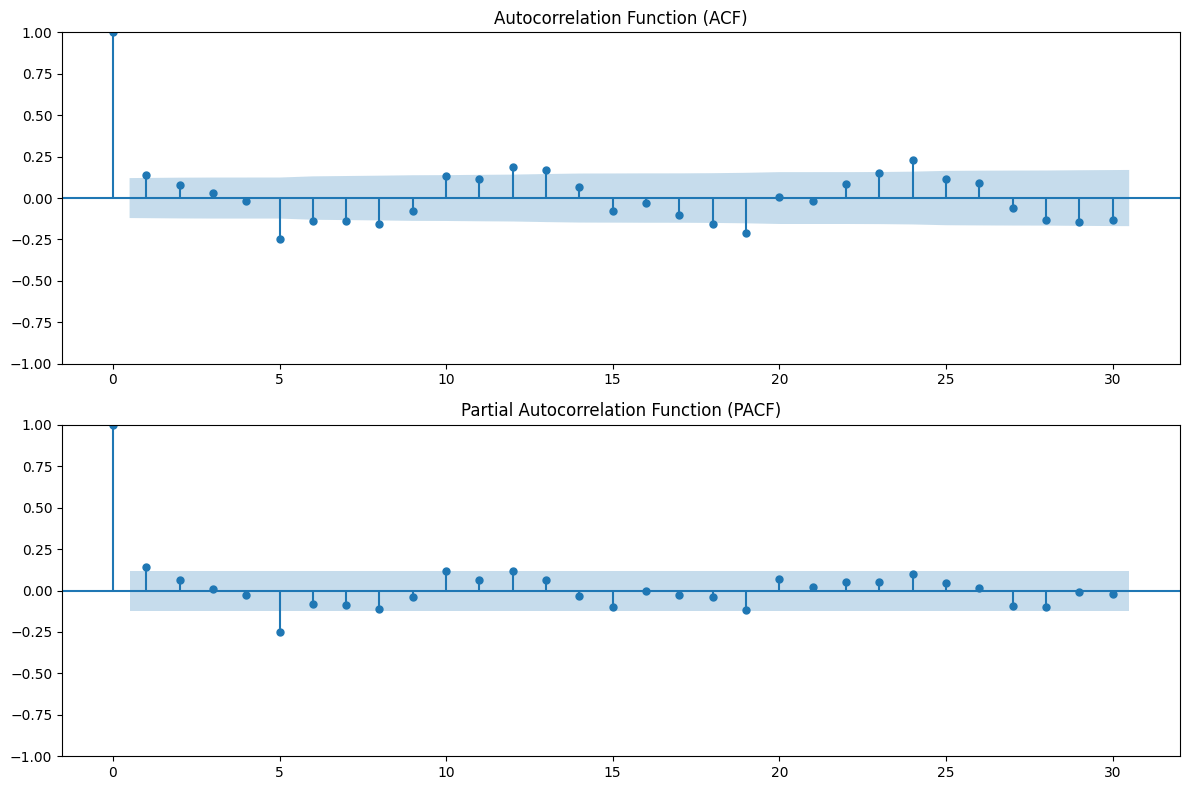

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series = data['Sales']

# Create a figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF on the first subplot
plot_acf(time_series, lags=30, ax=ax1) #'lags' parameter determine the number of lags to display
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF on the second subplot
plot_pacf(time_series, lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

ACF and PACF Analysis to identify parameters for time series models:

The Autocorrelation Function (ACF) shows a significant spike at lag 1,
The Partial Autocorrelation Function (PACF) shows a significant spike at lag 1,

For ARIMA: Helps set the p (AR order) = 1 and q (MA order) = 1.

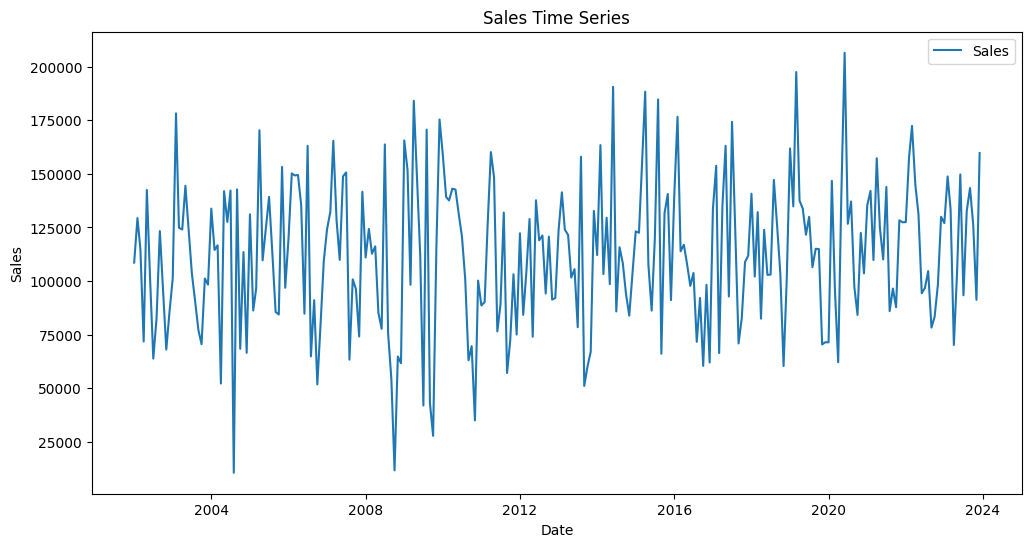

In [ ]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label="Sales")
plt.title("Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


#Split the dataset into training and testing

In [ ]:
# Separate features (X) and target (y)
X = data[['Year', 'Quarter', 'Month', 'DayOfWeek', 'Holiday', 'Promotion']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (211, 6)
X_test shape: (53, 6)
y_train shape: (211,)
y_test shape: (53,)


##Build  ARIMA Model:

Stationarity Check

In [ ]:
# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(data['Sales'])
adf_results = {
    "Test Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Lags Used": adf_test[2],
    "Number of Observations": adf_test[3],
    "Critical Values": adf_test[4],
}
print('The adf_results')
adf_results

The adf_results


{'Test Statistic': -4.471046070251254,
 'p-value': 0.00022173509005268892,
 'Lags Used': 11,
 'Number of Observations': 252,
 'Critical Values': {'1%': -3.4565688966099373,
  '5%': -2.8730786194395455,
  '10%': -2.5729189953388762}}

In this case:

The p-value (0.00022) is less than the common significance level of 0.05.

The test statistic (-4.47) is more negative than all the critical values.

Therefore, we reject the null hypothesis and conclude that the time series data is likely stationary and does not require differencing.

In [ ]:
# Train-Test Split
train_size = int(len(data['Sales']) * 0.8)
train, test = data['Sales'][:train_size], data['Sales'][train_size:]


In [ ]:
# ARIMA Model Fitting
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  211
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2505.193
Date:                Sun, 12 Jan 2025   AIC                           5018.386
Time:                        22:48:08   BIC                           5031.793
Sample:                    01-01-2002   HQIC                          5023.805
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   2940.523     37.777      0.000    1.05e+05    1.17e+05
ar.L1          0.4280      0.437      0.978      0.328      -0.429       1.285
ma.L1         -0.3064      0.453     -0.676      0.4

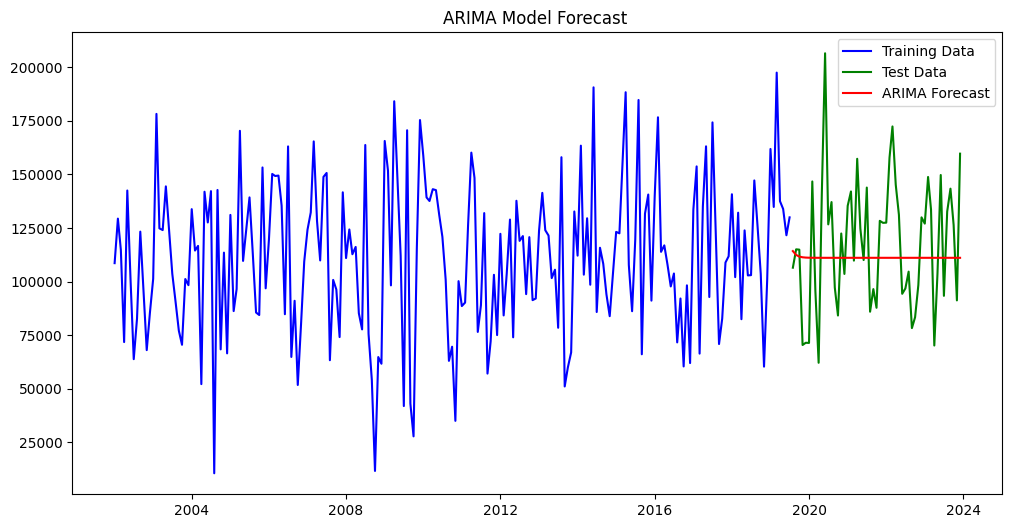

In [ ]:
# Generate the forecast using the fitted model
arima_forecast = model_fit.forecast(steps=len(test))

# Forecast
forecast = model_fit.get_forecast(steps=len(test))
forecast_data = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=test.index)

# Round forecast values to 2 decimal places
forecast_data['Forecast'] = forecast_data['Forecast'].round(2)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='green')
# Use forecast_data for plotting
plt.plot(forecast_data.index, forecast_data['Forecast'], label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast ')
plt.legend()
plt.show()

#Build the ETS Model

In [ ]:
# ETS Model
ets_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)
ets_fit = ets_model.fit()

print("Training ETS Model...")

Training ETS Model...


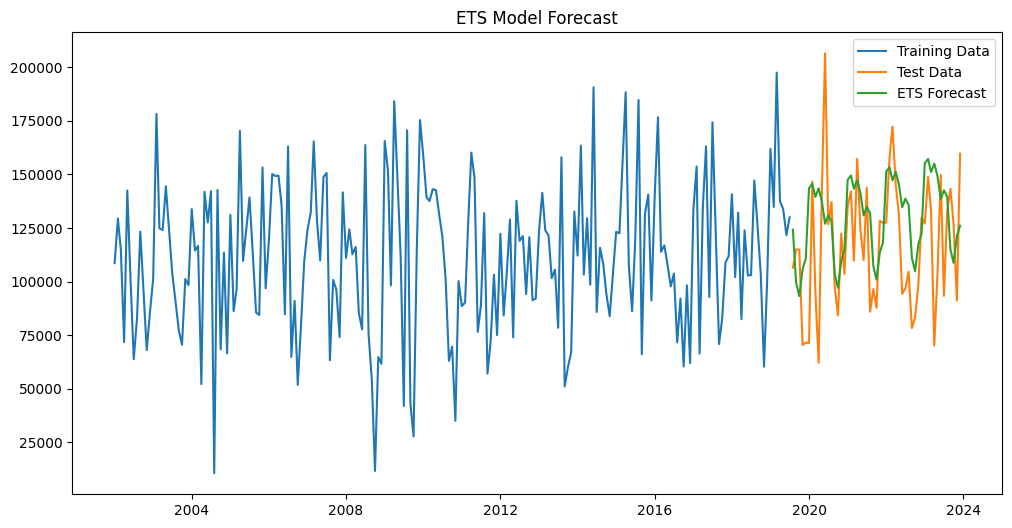

In [ ]:
# Forecast for the length of the test set
forecast_ets = ets_fit.predict(start=test.index[0], end=test.index[-1])

# Visualize Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_ets, label='ETS Forecast')
plt.legend()
plt.title('ETS Model Forecast')
plt.show()

In [ ]:
 #Calculate evaluation metrics for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)

# Calculate evaluation metrics for ETS
ets_rmse = np.sqrt(mean_squared_error(test, forecast_ets))
ets_mae = mean_absolute_error(test, forecast_ets)

# Create a table using pandas DataFrame
evaluation_table = pd.DataFrame({
    'Model': ['ARIMA', 'ETS'],
    'RMSE': [arima_rmse, ets_rmse],
    'MAE': [arima_mae, ets_mae]
})

# Display the table
print(evaluation_table)

   Model          RMSE           MAE
0  ARIMA  30307.257416  25187.767836
1    ETS  31772.046436  24549.700275


In [ ]:
best_model = "ARIMA" if arima_rmse < ets_rmse else "ETS"
print(f"Best Model: {best_model}")

if best_model == "ARIMA":
    # Use the fitted ARIMA model (model_fit) for forecasting
    final_forecast = model_fit.get_forecast(steps=4).predicted_mean
else:
    # Use the fitted ETS model (ets_fit) for forecasting
    final_forecast = ets_fit.forecast(steps=4)

Best Model: ARIMA


In [ ]:
# Create a date range for the forecast period
forecast_dates = pd.date_range(start=test.index[-1] + pd.offsets.MonthBegin(1), periods=4, freq='MS')  # 'MS' for month start

# Create a DataFrame for the forecast
forecast_data = pd.DataFrame({'Forecast': final_forecast.values}, index=forecast_dates)

# Concatenate historical and forecasted data for plotting
plot_data = pd.concat([data['Sales'], forecast_data['Forecast']], axis=1)

In [ ]:
# Print the concatenated data to check alignment
print("Plot Data (Historical + Forecast):")
print(plot_data.tail(10))

Plot Data (Historical + Forecast):
               Sales       Forecast
2023-07-01   93328.0            NaN
2023-08-01  132693.0            NaN
2023-09-01  143373.0            NaN
2023-10-01  126410.0            NaN
2023-11-01   91200.0            NaN
2023-12-01  159721.0            NaN
2024-01-01       NaN  114233.009661
2024-02-01       NaN  112432.667668
2024-03-01       NaN  111662.112193
2024-04-01       NaN  111332.310555


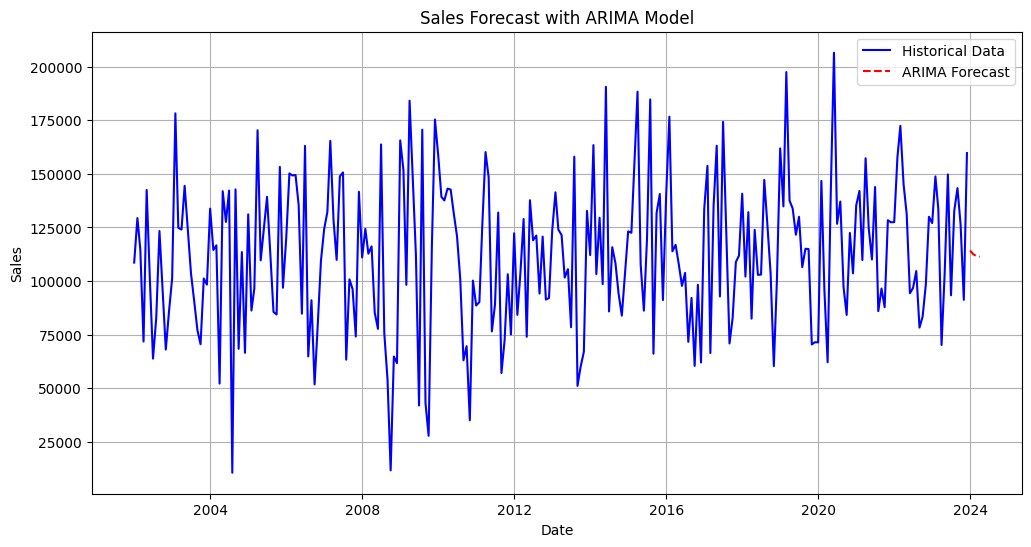

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Sales'], label='Historical Data', color='blue')
plt.plot(plot_data['Forecast'], label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Sales Forecast with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Print the 4-month forecast
print("4-Month Forecast:")
print(forecast_data)

4-Month Forecast:
                 Forecast
2024-01-01  114233.009661
2024-02-01  112432.667668
2024-03-01  111662.112193
2024-04-01  111332.310555


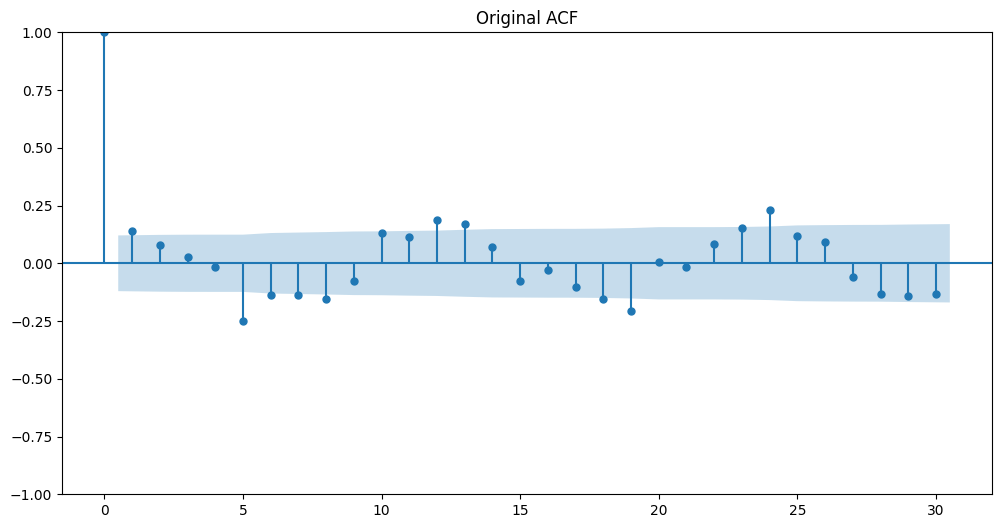

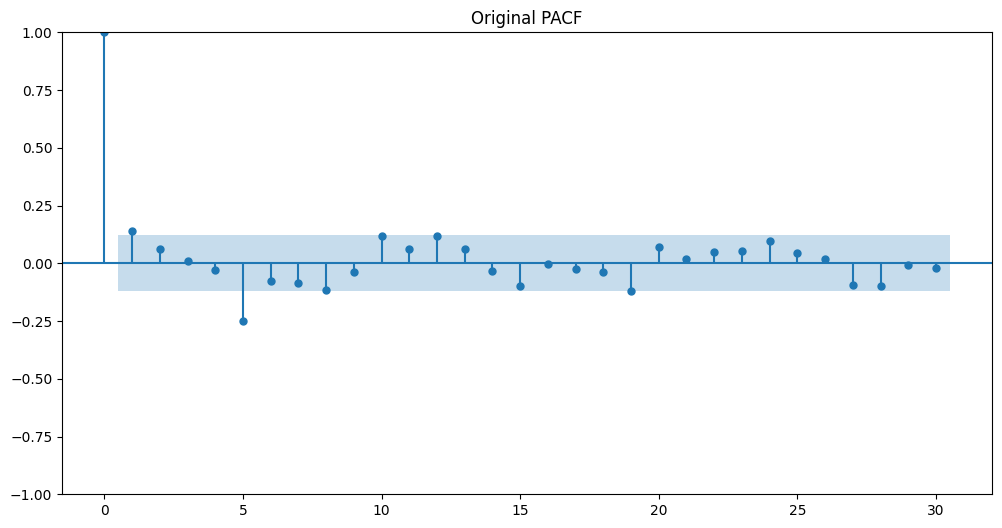

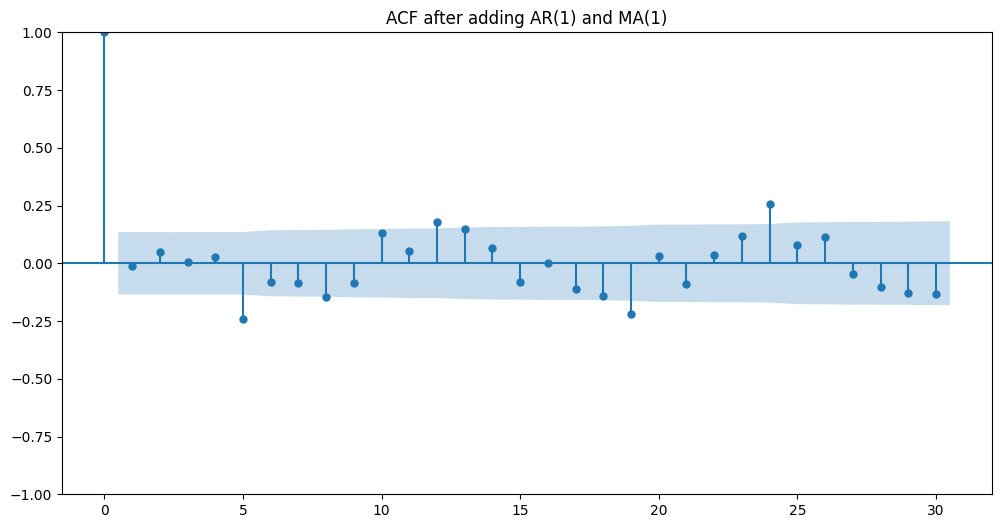

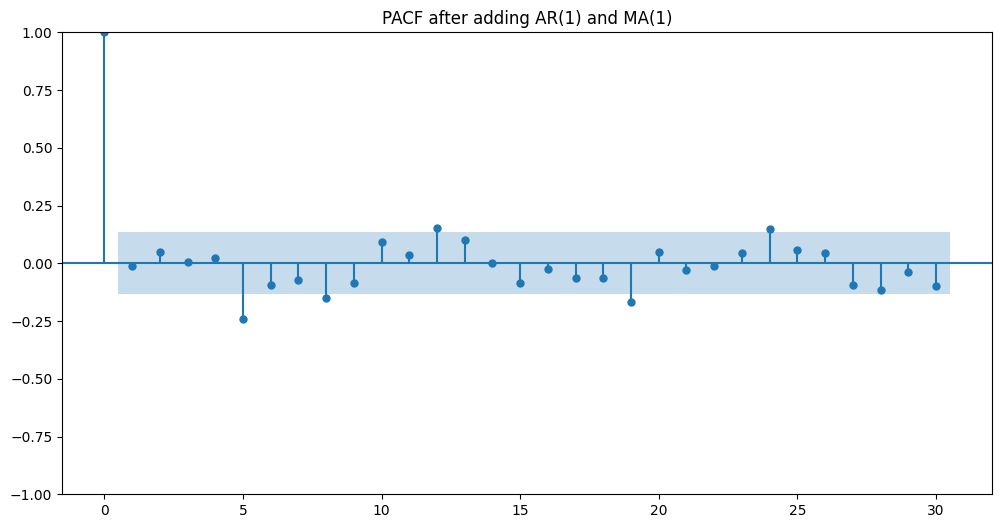

In [ ]:
# Original ACF and PACF
fig, ax = plt.subplots(figsize=(12, 6))

plot_acf(data['Sales'], lags=30, ax=ax)
plt.title('Original ACF')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data['Sales'], lags=30, ax=ax)
plt.title('Original PACF')
plt.show()


# ACF and PACF of residuals after adding a term
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
residuals = model_fit.resid

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=30, ax=ax)
plt.title('ACF after adding AR(1) and MA(1)')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(residuals, lags=30, ax=ax)
plt.title('PACF after adding AR(1) and MA(1)')
plt.show()

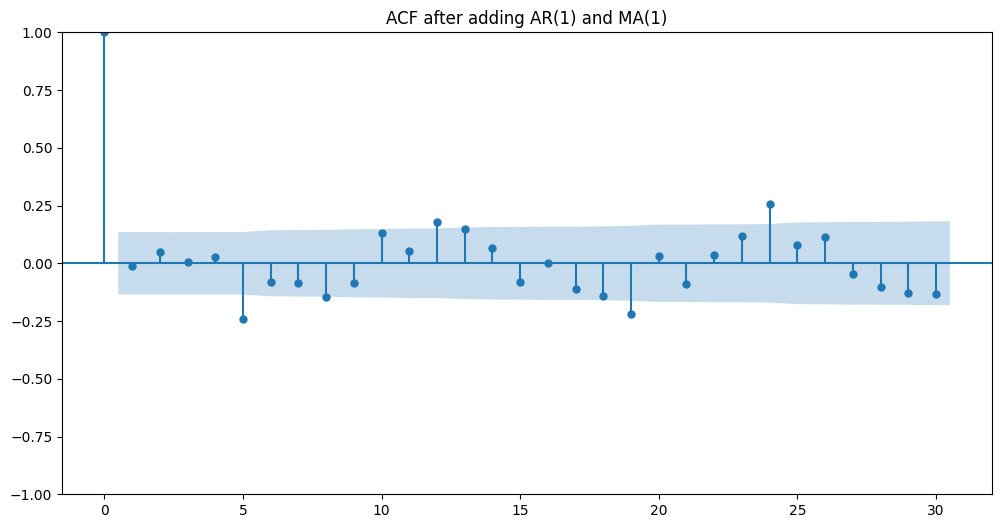

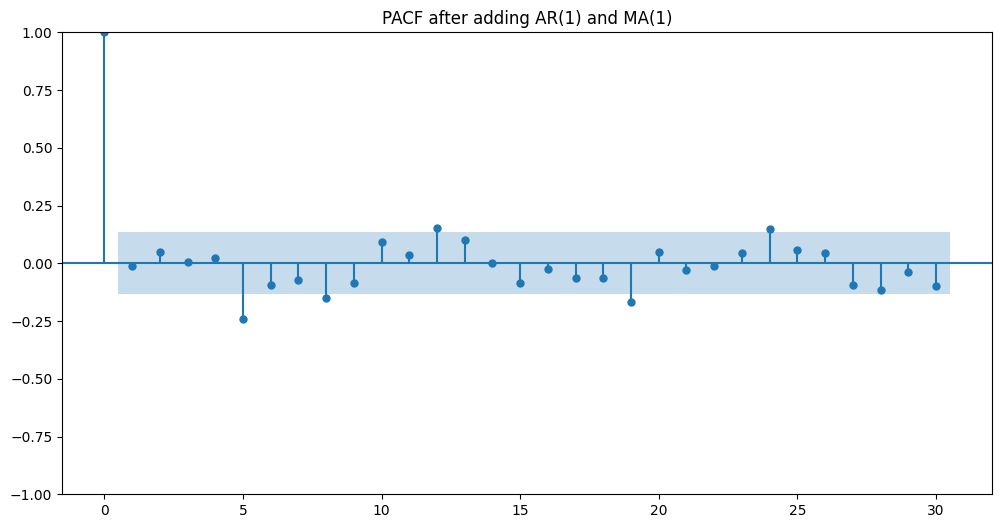

In [ ]:
# ACF and PACF of residuals after adding a term
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
residuals = model_fit.resid

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=30, ax=ax)
plt.title('ACF after adding AR(1) and MA(1)')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(residuals, lags=30, ax=ax)
plt.title('PACF after adding AR(1) and MA(1)')
plt.show()


Report

Original ACF and PACF

The original ACF plot shows significant autocorrelations at multiple lags, gradually decaying, suggesting a strong dependency on past values and the presence of an autoregressive (AR) component. The original PACF plot shows significant partial autocorrelations at the first few lags, with a relatively quick cutoff, suggesting the presence of a moving average (MA) component.


ACF and PACF of Residuals after Adding AR(1) and MA(1)


After adding AR(1) and MA(1) terms to the ARIMA model, the ACF and PACF plots of the residuals show a significant reduction in autocorrelations and partial autocorrelations at most lags. This indicates that the model has effectively captured the dependencies in the data. However, there might still be some minor autocorrelations remaining at certain lags, which could be further addressed by considering additional terms or model adjustments.

Key Differences


Reduction in Significant Lags: The most notable difference is the reduction in the number and magnitude of significant autocorrelations and partial autocorrelations in the residuals' plots compared to the original plots. This indicates that the model has captured some of the dependencies in the data.

Magnitude of Autocorrelations: The magnitude of the remaining autocorrelations and partial autocorrelations is smaller in the residuals' plots. This suggests that the model has reduced the strength of the dependencies.

Potential for Improvement: While the model has improved the residuals' ACF and PACF, there might still be some minor autocorrelations remaining at certain lags, suggesting potential for further model refinement.

By analyzing these differences, we can conclude that adding AR(1) and MA(1) terms to the ARIMA model has improved its ability to capture the dependencies in the data. However, there is still potential for further improvement by considering additional terms or adjustments

README file for your GitHub repository. Here's a breakdown of the steps involved:

1. Project Setup and Data Loading

* Import necessary libraries: The code starts by importing essential libraries like pandas, NumPy, matplotlib, seaborn, and statsmodels. These libraries are commonly used for data manipulation, analysis, and visualization.

* Clone the repository: The code then clones a GitHub repository containing the project files, including the dataset. Make sure you have Git installed and configured in your Colab environment.

* Navigate to the project directory: The %cd command is used to change the current working directory to the cloned repository.

* Set up Git configuration: If you plan to push changes back to the repository, you'll need to configure your Git email and username using !git config.

* Create a new branch: It's recommended to create a new branch for your work using !git checkout -b.

* Mount Google Drive (optional): If your dataset is stored in Google Drive, you can mount it to access the data directly within Colab.

* Load the dataset: The code reads the dataset from a CSV file using pd.read_csv.

2. Data Exploration and Analysis

* Univariate analysis: Explore individual variables using descriptive statistics, histograms, and other visualizations. This step helps understand the distribution and characteristics of each variable.

* Bivariate analysis: Analyze relationships between pairs of variables using scatter plots, box plots, and correlation matrices. This step helps identify potential dependencies and patterns between variables.

* Categorical variable analysis: Explore the distribution of categorical variables using bar charts and frequency tables. This step helps understand the composition and relationships between categories.

3. Data Preprocessing (if needed)

* Handling missing values: If there are missing values in the dataset, you might need to impute or remove them depending on the extent and nature of missingness.

* Feature engineering: Create new features from existing ones to improve model performance. This step often involves domain knowledge and creativity.

* Data transformation: Transform variables to meet the assumptions of the model you plan to use. This might involve scaling, normalization, or encoding categorical variables.

4. Model Selection and Training

* Choose an appropriate model: Based on the problem and the nature of the data, select a suitable model for forecasting. This could be a time series model like ARIMA, a regression model, or a machine learning algorithm.

* Train the model: Fit the chosen model to the data, using a portion of the data for training and the rest for validation. This step involves adjusting model parameters to minimize prediction errors.

5. Model Evaluation and Forecasting

* Evaluate the model: Assess the model's performance using metrics like RMSE, MAE, or R-squared. This step helps determine how well the model generalizes to unseen data.

* Generate forecasts: Use the trained model to make predictions for future time periods. This step involves specifying the forecast horizon and any relevant input variables.

6. Output and Interpretation

* Visualize the forecasts: Create plots to display the predicted values along with the actual data. This step helps communicate the forecast results effectively.

* Interpret the results: Analyze the forecast output and draw conclusions about the expected sales trends. This step involves considering the model's assumptions and limitations.
